# Building a User Car Prediction Model for Clutch
<br>
<br>
In this project, I will do some analysis on a sample data of used vehicles and deploy a Machine Learning model to predict vehicle prices by following the steps below.
<br>
<br>
1. <b>Import Packages:</b> We'll be importing relevant libraries and packages.
<br>
2. <b>Data Upload:</b> We are using a sample data scrape provided by Clutch.
<br>
3. <b>Business Problem:</b> We'll frame the problem based on the dataset description.
<br>
4. <b>Exploratory Data Analsis (EDA) I:</b> We'll carry out an exploratory analysis to figure out the important features and creating new combination of features.
<br>
5. <b>Data Cleaning and EDA II:</b> We'll clean the raw data and address any data quality issues. 
<br>
6. <b>Data Analysis:</b> At this step, we are going to be analyzing the cleaned data and providing insights. 
<br>
7. <b>Preprocessing and ML Modelling:</b> We'll process the data for ML models and do some feature engineering before we choose our ML algorithm. 
<br>

### Step 1: Import Packages

In [124]:
import datetime

import numpy as np
import pandas as pd

from wordcloud import WordCloud, STOPWORDS 

import re

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import statsmodels.api as sm


### Step 2: Data Upload

In [162]:
cars = pd.read_csv("vehicles.csv")

#Pandas normally shows a limited number of columns on Jupyter notebooks.
#The line below is enforcing it to display all the columns available. 

pd.set_option('display.max_columns', None)

cars.head(5)



id first_date_seen last_date_seen                vin  year      make  \
0  243517      2021-04-05     2021-05-03  2g2wp552071227768  2007   Pontiac   
1  341545      2021-04-16     2021-05-03  5FRYD4H26GB501859  2016     Acura   
2  345845      2021-04-16     2021-05-03                NaN  2005  Infiniti   
3  254761      2021-04-08     2021-05-03  1FTFW1EF1GFC52035  2016      Ford   
4  256183      2021-04-08     2021-05-03  2HKRM4H50FH112277  2015     Honda   

        model                                               trim  \
0  Grand Prix                                            4dr Sdn   
1         MDX  AWD|LEATHER|SUN ROOF|BACK UP CAM|HEATED SEATS|...   
2        G35X                                              Sedan   
3       F-150                                                 XL   
4        CR-V     EX, AWD, One Owner, Accident Free & Certified!   

        mileage        price                  color body_type drivetrain  \
0 166014.000000  3000.000000                   Blue     Sedan        FWD   
1  97902.000000 24989.000000  Lunar Silver Metallic       SUV        AWD   
2 108000.000000  6400.000000                   Gold     Sedan        AWD   
3 186750.000000 33821.000000                   Grey     Truck        4x4   
4 124394.000000 17443.000000                  White       SUV        AWD   

        transmission         fuel_type     engine  passengers  \
0          Automatic          Gasoline        NaN         NaN   
1  9 Speed Automatic  Premium Unleaded  3.5L 6cyl    7.000000   
2          Automatic          Gasoline        NaN         NaN   
3  6 Speed Automatic               Gas  5.0L 8cyl         NaN   
4          Automatic               Gas        2.4    5.000000   

                                         description  \
0  Pontiac Grand Prix 2007, mint condition, clean...   
1  2016 Acura MDX SH-AWD equipped with 3.5L V6 en...   
2  Runs very smooth just safetied last week, no d...   
3  At Barrie Ford, we've proudly dedicated oursel...   
4  EX, AWD, Cloth Interior, Power Drivers Seat, H...   

                                          carfax_url  is_private  \
0                                                NaN        True   
1  https://vhr.carfax.ca/main?id=19Q9m3cFZqcImHGA...       False   
2                                                NaN        True   
3  https://vhr.carfax.ca/main?id=sdxVNAZePXjizBpB...       False   
4  https://vhr.carfax.ca/main?id=PuOEHO4lvLFFsJ8X...       False   

            seller_name         city province  longitude  latitude  
0        Private Seller  MISSISSAUGA       ON -79.608894 43.531761  
1   Gorrud's Auto Group       Milton       ON -79.889107 43.525890  
2        Private Seller  MISSISSAUGA       ON -79.594269 43.619488  
3           BARRIE FORD       Barrie       ON -79.690971 44.333801  
4  TOP PICKS AUTO SALES    North Bay       ON -79.452217 46.290520

### Step 3: Business Problem

The dataset provided by Clutch online dealership contains market data obtained from listing websites. The dataset contains <b>price</b> variable which is continuous data and tells us about the asking price of each car in the dataset.

Our aim here is to analyze the data and <b>predict the price </b> of a car given that we have other attributes of that vehicle.

### Step 4: Exploratory Data Analsis (EDA)
<br>
In this part, we will follow the steps below and do our EDA to get more information about our data.
<br>

* Check data size
* Check data type of columns
* Check for duplicate entries
* Check for null values
* Check for data entry error and outliers
* Look for the frequency distribution in categorical columns
* Initial insights

#### Check data size

In [126]:
print("No. of rows: "+ str(cars.shape[0]))
print("No. of columns: "+ str(len(cars.columns)))

No. of rows: 52236
No. of columns: 25


We have a total of <b> 52,236</b> rows. Let's see what types of data we have under columns and see if we need to any cleaning and transformation. 

#### Check data types of columns

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               52236 non-null  int64  
 1   first_date_seen  52236 non-null  object 
 2   last_date_seen   52236 non-null  object 
 3   vin              41662 non-null  object 
 4   year             52236 non-null  int64  
 5   make             52236 non-null  object 
 6   model            52236 non-null  object 
 7   trim             48507 non-null  object 
 8   mileage          52129 non-null  float64
 9   price            52232 non-null  float64
 10  color            48810 non-null  object 
 11  body_type        48624 non-null  object 
 12  drivetrain       49503 non-null  object 
 13  transmission     50119 non-null  object 
 14  fuel_type        51012 non-null  object 
 15  engine           39242 non-null  object 
 16  passengers       21987 non-null  float64
 17  description 

#### Checking for duplicates


In [5]:
# Checking for duplicate entries but turns out there is none!
cars.duplicated().sum()

0

#### Checking for NULL values

As seen below, there are a lot null values that should be handled carefully. We'll address these issues going forward.

In [6]:
print("No. of rows:",cars.shape[0])
print("\n")
print("No. of nulls by columns")
cars.isnull().sum()

No. of rows: 52236


No. of nulls by columns


id                     0
first_date_seen        0
last_date_seen         0
vin                10574
year                   0
make                   0
model                  0
trim                3729
mileage              107
price                  4
color               3426
body_type           3612
drivetrain          2733
transmission        2117
fuel_type           1224
engine             12994
passengers         30249
description         4237
carfax_url         26872
is_private             0
seller_name           16
city                   0
province               0
longitude              0
latitude               0
dtype: int64

#### Check for data entry error and outliers

Let's see the data types again.

In [7]:
cars.select_dtypes(include=['object', 'category']).columns

Index(['first_date_seen', 'last_date_seen', 'vin', 'make', 'model', 'trim',
       'color', 'body_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine', 'description', 'carfax_url', 'seller_name', 'city',
       'province'],
      dtype='object')

Maximum and minimum values for all the numeric values below will be investigated in the future steps with focus on outliers.

In [8]:
cars_numeric_fields = ['year','mileage','price','passengers']
cars[cars_numeric_fields].describe().apply(lambda s: s.apply('{0:.0f}'.format))

year  mileage    price passengers
count  52236    52129    52232      21987
mean    2015    90893    25344          5
std        6    81670    28192          1
min     1914        0      100          0
25%     2013    38631    11500          5
50%     2017    73000    19900          5
75%     2018   128000    31590          5
max     2022  3965000  1399888         17

The data was collected from <b>April 2, 2021</b> to <b>May 3, 2021.</b>

In [9]:
print(cars.first_date_seen.min())
print(cars.first_date_seen.max())
print(cars.last_date_seen.min())
print(cars.last_date_seen.max())

2021-04-02
2021-05-03
2021-04-02
2021-05-03


#### Look for the category distribution in categorical columns

In [10]:
pd.set_option('display.max_rows', None)
cars["make"].value_counts()

Honda                    5296
Toyota                   4736
Ford                     4244
Chevrolet                3291
Hyundai                  3287
Nissan                   2887
BMW                      2701
Volkswagen               2295
Mercedes-Benz            2121
Mazda                    2069
Dodge                    2037
Jeep                     1868
Kia                      1665
Audi                     1581
Ram                      1524
Subaru                   1258
Lexus                    1201
GMC                      1059
Acura                    1055
Porsche                   597
Infiniti                  575
Cadillac                  567
Buick                     509
Land Rover                501
Chrysler                  483
Mitsubishi                470
MINI                      357
Volvo                     297
Lincoln                   278
Jaguar                    250
Pontiac                   220
Tesla                     129
Fiat                      110
Scion     

In [11]:
cars["model"].value_counts()

Civic                                         1299
CR-V                                          1261
Corolla                                       1107
RAV4                                          1102
Elantra                                        993
1500                                           932
F-150                                          932
Grand Caravan                                  931
Escape                                         829
Rogue                                          794
Mazda3                                         781
Civic Sedan                                    723
Cruze                                          645
Jetta                                          526
Camry                                          503
Tucson                                         501
Silverado 1500                                 494
CX-5                                           484
Mustang                                        465
Tiguan                         

In [12]:
cars.trim.value_counts()

SE                                                                                                     465
LX                                                                                                     344
Sport                                                                                                  317
EX                                                                                                     307
LE                                                                                                     282
Limited                                                                                                236
LT                                                                                                     199
Touring                                                                                                196
XLT                                                                                                    167
AWD 4dr                              

In [ ]:
cars.color.value_counts()

In [14]:
cars.body_type.value_counts()

SUV                       17024
Sedan                     15602
Hatchback                  3882
Truck                      3481
Coupe                      2761
Minivan                    2024
Convertible                1189
Wagon                      1035
Crew Cab                    547
Compact                     283
Regular Cab                 265
Truck Crew Cab              191
Extended Cab                 56
Quad Cab                     51
Super Crew                   46
Station Wagon                36
Truck Quad Cab               33
Truck Double Cab             26
Super Cab                    21
Truck Extended Cab           17
Truck Regular Cab            11
Roadster                     11
Truck Super Cab               7
Mega Cab                      5
Truck King Cab                3
Truck Mega Cab                3
Truck Long Regular Cab        3
Cabriolet                     3
Truck Short Double Cab        2
Truck Long Double Cab         1
Cab and Chassis               1
Truck Lo

In [15]:
cars.drivetrain.value_counts()

FWD    19520
AWD    17959
4x4     5299
RWD     3790
4WD     1828
4X4     1094
2WD       13
Name: drivetrain, dtype: int64

In [16]:
cars.transmission.value_counts()

Automatic                            27895
6 Speed Automatic                     6375
CVT                                   4636
8 Speed Automatic                     4024
Manual                                2683
9 Speed Automatic                     1023
7 Speed Automatic                      953
6 Speed Manual                         706
5 Speed Automatic                      550
4 Speed Automatic                      364
10 Speed Automatic                     340
5 Speed Manual                         205
7 Speed Automatic with auto-shift      110
1 Speed Automatic                      107
6 Speed Automatic with auto-shift       68
8 Speed Automatic with auto-shift       46
7 Speed Manual                          21
4 Speed Manual                           5
5 Speed Automatic with auto-shift        4
3 Speed Automatic                        2
2 Speed CVT                              1
Sequential                               1
Name: transmission, dtype: int64

In [17]:
cars.fuel_type.value_counts()

Gas                         34339
Gasoline                    10864
Premium Unleaded             1183
Diesel                       1058
Flexible                     1007
Regular Unleaded              944
Gasoline Hybrid               721
Electric                      356
Other                         238
Gasoline - Hybrid             162
E85- Gasoline(Flex Fuel)      115
Gasoline Fuel                  13
Other/Don’t Know               12
Name: fuel_type, dtype: int64

In [18]:
cars.engine.value_counts()

4 Cylinder Engine                                     10248
V6 Cylinder Engine                                     3921
8 Cylinder Engine                                      1531
2.0L 4cyl                                              1519
2                                                      1087
2.5L 4cyl                                               923
3.5L 6cyl                                               874
I-4 cyl                                                 789
3.6L 6cyl                                               721
V-6 cyl                                                 507
2.5                                                     464
1.8L 4cyl                                               462
Straight 6 Cylinder Engine                              453
2.4L 4cyl                                               444
3.5                                                     388
1.5L 4cyl                                               378
2.0L                                    

In [19]:
cars.city.value_counts()

Toronto                    4180
Ottawa                     2517
Mississauga                2393
Brampton                   1881
London                     1877
Oakville                   1278
Vaughan                     986
North York                  944
Markham                     942
Scarborough                 930
St. Catharines              888
Hamilton                    870
MISSISSAUGA                 866
BRAMPTON                    778
Whitby                      708
Kitchener                   698
Guelph                      681
Burlington                  677
Newmarket                   675
Windsor                     665
Thornhill                   657
Barrie                      637
Kingston                    631
Milton                      586
TORONTO                     578
Etobicoke                   553
Waterloo                    550
NORTH YORK                  510
Richmond Hill               508
Brantford                   505
Woodbridge                  471
SCARBORO

In [20]:
cars.seller_name.value_counts()

Private Seller                                            12507
Strickland's Stratford                                      308
CLUTCH - Belleville                                         300
CLUTCH - Owen Sound                                         300
Strickland's Automart                                       287
Strickland's Windsor                                        250
Whitby Oshawa Honda                                         242
Auto Planet Brampton                                        240
Carleton Place Ford                                         221
Jim Thompson Chrysler                                       220
Guelph Hyundai                                              216
Clutch Toronto                                              193
CLUTCH LONDON                                               192
22G Auto Sales Ltd.                                         169
Autosonline.ca                                              165
Carhub North York Chrysler              

#### Initial insights

Looking at the initial EDA above, we can say that dataset is not the cleanest in the world. But it is an interesting one to work on for sure!

We will clean it by fixing data entry errors, imputing NULL values, clearing outliers, handling categorical values by string manipulations and some feature engineering in further steps.

### Step 5: Data Cleaning and EDA II
<br>
In this part, we'll clean the raw data and address any data quality issues by following the steps below.
<br>

* Correct data type issues
* Handle categorical variables with string manipulations
* Impute null values in categorical values, drop if needed
* Fix issues in numerical columns
* Look for new variables
<br>

####  Correct data type issues

* Let's see the datatypes again and decide what to do!


In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               52236 non-null  int64  
 1   first_date_seen  52236 non-null  object 
 2   last_date_seen   52236 non-null  object 
 3   vin              41662 non-null  object 
 4   year             52236 non-null  int64  
 5   make             52236 non-null  object 
 6   model            52236 non-null  object 
 7   trim             48507 non-null  object 
 8   mileage          52129 non-null  float64
 9   price            52232 non-null  float64
 10  color            48810 non-null  object 
 11  body_type        48624 non-null  object 
 12  drivetrain       49503 non-null  object 
 13  transmission     50119 non-null  object 
 14  fuel_type        51012 non-null  object 
 15  engine           39242 non-null  object 
 16  passengers       21987 non-null  float64
 17  description 

 * First off the bat, let's get the datefields correct. 

In [22]:
cars.first_date_seen=pd.to_datetime(cars.first_date_seen)
cars.last_date_seen=pd.to_datetime(cars.last_date_seen)

* <b>vin</b> and <b>carfax_url</b> fields have unique values for each and every data point so it's helpful to convert them to boolean. This info will also be relavant in our further analysis.

In [260]:
cars['vin_provided'] = cars.vin.apply(lambda x: 0 if pd.isnull(x) else 1)
cars['carfax_provided'] = cars.carfax_url.apply(lambda x: 0 if pd.isnull(x) else 1)
cars['is_private'] = cars.is_private.apply(lambda x: 0 if x is False else 1)
cars= cars.drop(columns=['vin','carfax_url'])

AttributeError: 'DataFrame' object has no attribute 'vin'

* <b>Trim</b> level has a lot of unique text info for each data point but it is not eligible to be converted into a categorical or a numeric column. So, our best bet is to merge it with the description column so that we can get some insights from the merged field.

In [226]:
cars["description"] = cars["trim"].map(str)+ ' ' + cars["description"].map(str)
cars= cars.drop(columns=['trim'])

#### Handle categorical variables with string manipulations

* Color field is an important one but has a lot of unique values that needs a bit of string manipulation.

In [25]:
cars.color.value_counts()

Black                                                  8912
White                                                  7580
Grey                                                   4904
Blue                                                   3432
Silver                                                 3315
Red                                                    2471
Gray                                                    806
Crystal Black Pearl                                     480
Brown                                                   426
Dark Grey                                               409
Green                                                   393
Beige                                                   364
Not Specified                                           344
Alpine White                                            281
Bright White                                            263
Orange                                                  249
Gold                                    

In [257]:
cars.loc[cars['color'].str.contains('white',na=False,flags=re.IGNORECASE), 'color'] = 'White'
cars.loc[cars['color'].str.contains('black',na=False,flags=re.IGNORECASE), 'color'] = 'Black'
cars.loc[cars['color'].str.contains('red',na=False,flags=re.IGNORECASE), 'color'] = 'Red'
cars.loc[cars['color'].str.contains('silver',na=False,flags=re.IGNORECASE), 'color'] = 'Silver'
cars.loc[cars['color'].str.contains('gray',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('grey',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('charcoal',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('granite',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('blue',na=False,flags=re.IGNORECASE), 'color'] = 'Blue'
cars.loc[cars['color'].str.contains('metallic',na=False,flags=re.IGNORECASE), 'color'] = 'Metallic'
cars.loc[cars['color'].str.contains('steel',na=False,flags=re.IGNORECASE), 'color'] = 'Metallic'
cars.loc[cars['color'].str.contains('green',na=False,flags=re.IGNORECASE), 'color'] = 'Green'
cars.loc[cars['color'].str.contains('brown',na=False,flags=re.IGNORECASE), 'color'] = 'Brown'

cars["color"] = \
             np.where(cars.groupby(["color"])["color"].transform('count') >= 50, 
                      cars.color, 'Other')
cars.loc[cars.color=='Not Specified',"color"]="Other"
cars.color.value_counts()


Black             12404
White             10869
Gray               7555
Blue               4895
Other              4749
Silver             4744
Red                3444
Metallic           1004
Green               489
Brown               454
Beige               362
Orange              248
Gold                228
Burgundy            146
Yellow              139
Blizzard Pearl      102
Maroon               81
Purple               62
Bronze               53
Name: color, dtype: int64

* There are a lot of car manufacturers under <b>make</b> field and the size of the unique list makes it harder to analyze. So, I am going to mask them by tagging smaller brands as 'Other'. This is totally a random threshold. I initially set it to <b>brands with # of records > 100</b> but that was filtering out many sport vehicles and I did not want to exclude them. Instead, I remove those under 15.

In [261]:
cars["make"] = \
             np.where(cars.groupby(["make"])["make"].transform('count') >= 15, 
                      cars.make, 'Other')
cars.loc[cars['make'].str.contains('mercedes',na=False,flags=re.IGNORECASE), "make"] = 'Mercedes'
cars.make.value_counts()

Honda           5272
Toyota          4723
Ford            4218
Hyundai         3277
Chevrolet       3273
Nissan          2883
BMW             2697
Volkswagen      2290
Mercedes        2136
Mazda           2064
Dodge           2028
Jeep            1859
Kia             1659
Audi            1579
Ram             1517
Subaru          1255
Lexus           1186
Acura           1054
GMC             1049
Porsche          591
Infiniti         574
Cadillac         563
Buick            507
Land Rover       500
Chrysler         481
Mitsubishi       469
MINI             357
Volvo            297
Lincoln          277
Jaguar           250
Pontiac          218
Tesla            129
Fiat             110
Scion             80
Other             78
Maserati          59
Ferrari           47
Saturn            38
Alfa Romeo        37
Lamborghini       36
Suzuki            36
Genesis           30
smart             28
Bentley           27
Hino              27
Aston Martin      23
Oldsmobile        21
McLaren      

* Can't do anything about the <b>model</b> field. There are many unique fields for each car brand and it is not feasible to do any sory of transformation on it. I'll just display the unique values here!

In [28]:
cars.model.str.title().value_counts()

Civic                                         1299
Cr-V                                          1261
Corolla                                       1107
Rav4                                          1102
Elantra                                        993
F-150                                          932
1500                                           932
Grand Caravan                                  931
Escape                                         829
Rogue                                          794
Mazda3                                         781
Civic Sedan                                    723
Cruze                                          645
Jetta                                          526
Camry                                          503
Tucson                                         501
Silverado 1500                                 494
Cx-5                                           484
Mustang                                        465
Tiguan                         

* <b>Body_type</b> field might help us drive insights from the dataset but it requires a bit of string manipulations. If I have time, I will write a separate function for the code below because this type of cleaning is required for other fields as well. 

In [262]:
cars.loc[cars['body_type'].str.contains('truck',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('cabriolet',na=False,flags=re.IGNORECASE), 'body_type'] = 'Convertible'
cars.loc[cars['body_type'].str.contains('cab',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('wagon',na=False,flags=re.IGNORECASE), 'body_type'] = 'Station Wagon'
cars.loc[cars['body_type'].str.contains('super crew',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('cutaway',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('avant',na=False,flags=re.IGNORECASE), 'body_type'] = 'Station Wagon'

cars.body_type.value_counts()

SUV              16946
Sedan            15558
Truck             4751
Hatchback         3872
Coupe             2743
Minivan           2016
Convertible       1180
Station Wagon     1068
Compact            283
Roadster            11
Name: body_type, dtype: int64

* <b>Drive_Train</b> columns is also useful one. It also needs a bit of string manipulations. A little domain knowledge might come in handy at this part of the analysis. You can also do online research about what the main drive_train types are and what keywords are used interchangibly for those categories.   

In [30]:
cars.drivetrain.value_counts()

FWD    19520
AWD    17959
4x4     5299
RWD     3790
4WD     1828
4X4     1094
2WD       13
Name: drivetrain, dtype: int64

In [263]:
cars.loc[cars.drivetrain == '2WD', 'drivetrain'] = "FWD" # this one is just an assumption. It could be RWD as well!
cars.loc[cars.drivetrain.isin(['4X4','4x4']), 'drivetrain'] = "4WD"
cars.drivetrain.value_counts()

FWD    19468
AWD    17898
4WD     8182
RWD     3767
Name: drivetrain, dtype: int64

* <b> Transmission </b> field is also a valueable one. We are applying our good old method to do some transformation here as well. 

In [264]:
cars.transmission=cars.transmission.astype('str')

cars.loc[cars['transmission'].str.contains('Automatic'), 'transmission'] = 'Automatic'
cars.loc[cars['transmission'].str.contains('Manual'), 'transmission'] = 'Manual'
cars.loc[cars['transmission'].str.contains('Sequential'), 'transmission'] = 'Manual'
cars.loc[cars['transmission'].str.contains('CVT'), 'transmission'] = 'CVT'

cars.loc[cars.transmission == 'nan', 'transmission'] = None

* Let's also look at the <b>fuel_type</b> field. 

In [265]:
cars['fuel_type'] = cars['fuel_type'].replace(['Premium Unleaded','Gasoline','Gasoline Fuel','Regular Unleaded'],'Gas')
cars['fuel_type'] = cars['fuel_type'].replace(['E85- Gasoline(Flex Fuel)'],'Flexible')
cars['fuel_type'] = cars['fuel_type'].replace(['Other/Don’t Know'],'Other')
cars['fuel_type'] = cars['fuel_type'].replace(['Gasoline Hybrid','Gasoline - Hybrid'],'Hybrid')

* For the <b>engine </b> field, we are going to do our transformation. However, due to the way that data points were entered, it is not too feasible to work on every unique record. Instead, we will focus on transforming the field so in a way that we can extract <b># of cylinders</b> as a close proxy in a separate field in the further steps.   

In [266]:
cars.loc[cars['engine'].str.contains("4 cyl",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4 cyclinder",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4-cyclinder",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4cyl",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("6 cyl",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("6cyl",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("8cyl",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("8 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("v6",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("v-6",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("3 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '3 Cylinder'
cars.loc[cars['engine'].str.contains("5 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '5 Cylinder'
cars.loc[cars['engine'].str.contains("5cyl",na=False,flags=re.IGNORECASE), "engine"] = '5 Cylinder'
cars.loc[cars['engine'].str.contains("3cyl",na=False,flags=re.IGNORECASE), "engine"] = '3 Cylinder'
cars.loc[cars['engine'].str.contains("v8",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("v-8",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'

cars.loc[~cars.engine.isin(['4 Cylinder','6 Cylinder','8 Cylinder','3 Cylinder','5 Cylinder']),'engine'] = None

* Nothing interesting in this <b>seller_name</b> field because there are all small dealers except for a few big chains. If we had more data points from CLUTCH, we might have been able to calculate a new field and see if it is significant at all. But unfortunately we have not! Also, the largest group in the output below is 'Private' sellers. We already have a separate column for this information. That's why we'll drop this column in the next steps.

In [267]:
cars.loc[cars['seller_name'].str.contains("toyota",na=False,flags=re.IGNORECASE), "seller2"] = 'toyota'
cars.loc[cars['seller_name'].str.contains("honda",na=False,flags=re.IGNORECASE), "seller2"] = 'honda'
cars.loc[cars['seller_name'].str.contains("clutch",na=False,flags=re.IGNORECASE), "seller2"] = 'clutch'
cars.loc[cars['seller_name'].str.contains("dodge",na=False,flags=re.IGNORECASE), "seller2"] = 'dodge'
cars.loc[cars['seller_name'].str.contains("private",na=False,flags=re.IGNORECASE), "seller2"] = 'private'
cars.loc[cars['seller_name'].str.contains("ford",na=False,flags=re.IGNORECASE), "seller2"] = 'ford'
cars.loc[cars['seller_name'].str.contains("hyundai",na=False,flags=re.IGNORECASE), "seller2"] = 'hyundai'


cars.seller2.value_counts()

private    12494
ford        3085
honda       2692
toyota      2270
dodge       1710
hyundai     1562
clutch       985
Name: seller2, dtype: int64

####  Impute null values, drop them if needed

We have a lot of null values. We will use two techniques to get rid of them or impute them from other fields where applicable. Main NULL elimination techniques we use are: 
* Backward, forward imputation
* Taking group mean

First, let's see how many we got null values in each field.

In [36]:
cars.isnull().sum()

id                     0
first_date_seen        0
last_date_seen         0
year                   0
make                   0
model                  0
mileage              107
price                  4
color                  0
body_type           3612
drivetrain          2733
transmission        2117
fuel_type           1224
engine             22212
passengers         30249
description            0
is_private             0
seller_name           16
city                   0
province               0
longitude              0
latitude               0
vin_provided           0
carfax_provided        0
seller2            27395
dtype: int64

In [268]:
cars['body_type']=cars.groupby('model')['body_type'].ffill().bfill()
cars.body_type.value_counts()

SUV              19732
Sedan            15914
Truck             4830
Hatchback         3962
Coupe             2815
Minivan           2102
Convertible       1230
Station Wagon     1146
Compact            285
Roadster            12
Name: body_type, dtype: int64

In [269]:
cars['drivetrain']=cars.groupby(['make','model'])['drivetrain'].ffill().bfill()

cars.drivetrain.value_counts()

FWD    21167
AWD    18419
4WD     8389
RWD     4053
Name: drivetrain, dtype: int64

In [270]:
cars['transmission']=cars.groupby(['make','model'])['transmission'].ffill().bfill()
cars.transmission.value_counts()

Automatic    43429
CVT           4768
Manual        3831
Name: transmission, dtype: int64

In [144]:
cars['fuel_type']=cars.groupby(['make','model'])['fuel_type'].ffill().bfill()
cars["fuel_type"].value_counts()

Gas         48512
Flexible     1138
Diesel       1072
Hybrid        897
Electric      362
Other         255
Name: fuel_type, dtype: int64

In [271]:
cars['engine']=cars.groupby(['make','model','body_type'])['engine'].ffill().bfill()

cars["cylinders"]=cars.engine.str.replace('Cylinder','',regex=True).astype(int)
cars= cars.drop(columns=['engine'])
cars.cylinders.value_counts()

4    31122
6    15179
8     5300
3      237
5      190
Name: cylinders, dtype: int64

In [272]:
cars["city"] = cars.city.str.title() #Fixing UPPER, LOWER case inconsistencies.

cars.loc[cars.city == 'Richmond', 'city'] = 'Richmond Hill' #City was mistakenly recorded as Richmond (BC) instead of 
## Richmond Hill (ON). I checked the longitude and latitude values to make sure and fix it manually.


toronto_gta=['Toronto','North York','Scarborough','Etobicoke','York'
            'Burlington','Oakville','Milton','Halton Hills',
            'Mississauga','Brampton','Caledon',
             'Vaughan','Concord','Unionville','Markham','Newmarket','Richmond Hil','King','Stouffville','East Gwillimbury','Whitchurch-Stouffville','Aurora','Georgina',
             'Pickering','Ajax','Whitby','Uxbridge','Brock','Scugog','Oshawa','Clarington'
            ] 
## There a lot of unique values so instead we are creating a new, boolean column to check if the car is in Toronto GTA.

cars["toronto_gta"]= np.where(cars.city.str.contains('|'.join(toronto_gta)), 1, 0)



cars.toronto_gta.value_counts()




AttributeError: 'DataFrame' object has no attribute 'city'

In [313]:
cars=cars.drop(columns=['seller_name','seller2']) # Dropping seller name columns b/c we're not getting any info from them.  

#### Fix issues in numerical columns

In [160]:
cars.describe()

id         year        mileage          price   passengers  \
count  52236.000000 52236.000000   52129.000000   52232.000000 21987.000000   
mean  329720.278582  2014.805288   90893.014157   25343.834737     5.036385   
std    62476.292908     6.118057   81670.438786   28191.647047     1.252359   
min   229825.000000  1914.000000       0.000000     100.000000     0.000000   
25%   266646.750000  2013.000000   38631.000000   11500.000000     5.000000   
50%   349246.500000  2017.000000   73000.000000   19900.000000     5.000000   
75%   384191.250000  2018.000000  128000.000000   31590.000000     5.000000   
max   419557.000000  2022.000000 3965000.000000 1399888.000000    17.000000   

         longitude     latitude    cylinders  toronto_gta  
count 52236.000000 52236.000000 52236.000000 52236.000000  
mean    -79.331784    43.821639     4.991194     0.465292  
std       2.009345     0.760756     1.351599     0.498799  
min    -116.521500    42.029045     3.000000     0.000000  
25%     -79.875504    43.438549     4.000000     0.000000  
50%     -79.549228    43.726730     4.000000     0.000000  
75%     -79.262787    43.939625     6.000000     1.000000  
max     -53.979370    51.016666     8.000000     1.000000

* <b>Year</b>

In [163]:
cars[cars.year== 1914] #Checking if 1914 is a data entry or an actual data point.

id first_date_seen last_date_seen  vin  year  make    model   trim  \
40446  282901      2021-04-14     2021-04-15  NaN  1914  Ford  Model T  Brass   
40887  283104      2021-04-14     2021-04-15  NaN  1914  Ford  Model T  Brass   

         mileage        price color    body_type drivetrain transmission  \
40446 123.000000 20000.000000  Grey  Convertible        RWD       Manual   
40887 124.000000 24500.000000  Grey  Convertible        RWD       Manual   

      fuel_type engine  passengers  \
40446  Gasoline    NaN         NaN   
40887  Gasoline    NaN         NaN   

                                             description carfax_url  \
40446  1914 model t speedster Completely restored Reb...        NaN   
40887  1914 model t Roadster Completely restored Engi...        NaN   

       is_private     seller_name       city province  longitude  latitude  
40446        True  Private Seller  BALTIMORE       ON -78.150002 44.033333  
40887        True  Private Seller  BALTIMORE       ON -78.150002 44.033333

These two cars look like they are duplicates and they are from Baltimore, a US city out of the scope of this analysis. Let's remove them.


In [173]:
cars=cars[cars.city.str.title()!='Baltimore']

Now, it is better that we bring an age field created from the year column.

In [166]:
cars["age"]=2021-cars["year"]

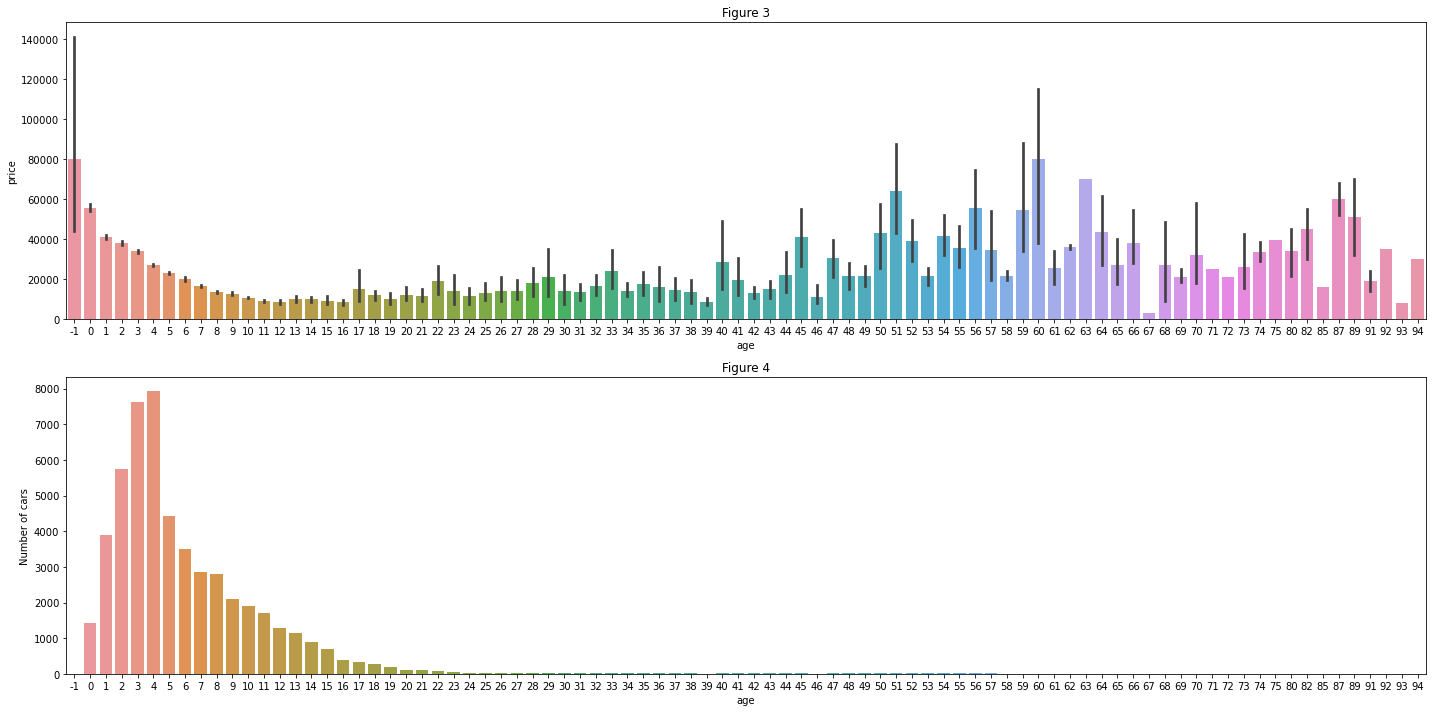

In [174]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='age',y='price',data=cars,ax=axs[0])
sns.barplot(cars.groupby('age').count()['price'].index,cars.groupby('age').count()['price'].values,ax=axs[1])
axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.show()

Looking at the graphs above, it makes a lot of sense to me that at this point we should create a new field that would account old, classic cars or in broader terms vehicles that increase in value as they get old unlike the new cars?

In most provinces in Canada, the minimum age for a car to get vintage license plate is 30.

In [177]:
cars.loc[cars.age > 30, "vintage"] = 1
cars.loc[cars.vintage != 1, "vintage"] = 0  
cars.vintage.value_counts()

0.000000    51711
1.000000      519
Name: vintage, dtype: int64

* <b>Mileage</b>

In [178]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #Just a formatting script

cars.mileage.describe()

count     52123
mean      90894
std       81667
min           0
25%       38635
50%       73000
75%      128000
max     3965000
Name: mileage, dtype: float64

In [179]:
cars.loc[(cars.mileage==0) & (cars.year < 2019),'mileage']=None # Assuming that old cars can't have 0 km.

In [180]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
cars.mileage.describe()

count     52034
mean      91050
std       81651
min           0
25%       38800
50%       73103
75%      128000
max     3965000
Name: mileage, dtype: float64

In [181]:
## Again we are subsetting our data. This is not by intuition. I checked the vehicle with the max mileage(3965000).
## Turns out it is a data error with null values in other fields too. That's why I removed it and limited our 
## analysis to only those below 3,000,000 altough this, too, smells fishy. We'll take care of it in the next steps!

cars= cars[cars['mileage'] < 3000000] 
cars.mileage.describe()


count     52032
mean      90919
std       78842
min           0
25%       38800
50%       73102
75%      128000
max     2900000
Name: mileage, dtype: float64

In [182]:
cars[cars['mileage'] > 1000000]

#looks like people were putting an extra digit by mistake. We can divide those by 10 and fix this issue.


id first_date_seen last_date_seen                vin  year  \
2571   389613      2021-04-27     2021-04-27                NaN  2012   
3318   369570      2021-04-22     2021-05-03  JM1BL1SFXA1253779  2010   
3873   373442      2021-04-23     2021-04-27                NaN  2006   
6507   349641      2021-04-17     2021-05-03                NaN  2006   
7567   262496      2021-04-09     2021-04-27                NaN  2005   
13682  386743      2021-04-26     2021-04-30                NaN  2010   
18779  255232      2021-04-08     2021-04-10                NaN  2010   
18835  243603      2021-04-05     2021-05-03  1HGCP2F7XAA803582  2010   
19871  367269      2021-04-22     2021-05-03                NaN  2015   
20233  418635      2021-05-03     2021-05-03                NaN  2007   
28112  341671      2021-04-16     2021-04-16                NaN  2013   
30156  235579      2021-04-03     2021-05-03                NaN  2014   
31243  245579      2021-04-06     2021-04-07                NaN  2013   
35482  256013      2021-04-08     2021-05-03                NaN  2014   
41592  249851      2021-04-07     2021-04-07                NaN  2011   
42614  353208      2021-04-18     2021-04-22                NaN  2013   
44287  393706      2021-04-28     2021-05-03  WMWSS7C59EWN71944  2014   
45146  249831      2021-04-07     2021-04-07  2d8hn44h68r810649  2008   
46767  282394      2021-04-14     2021-05-03                NaN  2010   
46956  384228      2021-04-25     2021-04-25                NaN  2013   

            make           model  \
2571       Mazda          Mazda3   
3318       Mazda          Mazda3   
3873        Audi        A6 Sedan   
6507         BMW            330I   
7567       Honda          Accord   
13682      Acura             TSX   
18779       Ford           F-150   
18835      Honda          Accord   
19871  Chevrolet        Suburban   
20233        BMW            335i   
28112    Porsche         Cayenne   
30156      Volvo         740/760   
31243     Toyota           Venza   
35482        Kia           Rondo   
41592     Nissan          Maxima   
42614    Hyundai         Elantra   
44287       MINI  Cooper Paceman   
45146      Dodge   Grand Caravan   
46767      Mazda    Mazda3 Sport   
46956      Honda           Civic   

                                                    trim  mileage  price  \
2571                                 4dr Sdn Auto GS-SKY  2320000   2500   
3318                                     4dr Sdn Auto GX  2390000   3200   
3873                                                 NaN  1840000   7000   
6507                                      330I automatic  1480000   7000   
7567                                       4dr LX-G Auto  1534000   3500   
13682                         4dr Sdn I4 Auto w/Tech Pkg  2100000   5900   
18779                               2WD SuperCab 145 XLT  2280359   9000   
18835                                     2dr I4 Auto EX  1680000   8000   
19871                                         4WD 4dr LT  1760000  29400   
20233                                                NaN  2200000   9000   
28112                                  AWD 4dr Tiptronic  1640000  27000   
30156                                                NaN  1299121  35000   
31243                                            4dr Wgn  2130000   9500   
35482                                                NaN  1720112   7900   
41592                              4dr Sdn V6 CVT 3.5 SV  2900000   4000   
42614                               4dr Sdn Auto Limited  1216100   2500   
44287  ALL4 2dr S PACEMAN SUNROOF NO ACCIDENT 2 SET OF R  1213817  14500   
45146                                         4dr Wgn SE  2623100   3120   
46767                                          Very good  2325990   3500   
46956                                   4dr Auto Touring  1560000  12500   

        color  body_type drivetrain transmission fuel_type             engine  \
2571    White      Sedan        FWD    Aut

In [183]:
cars.loc[(cars.mileage>1000000),'mileage']=cars.mileage/10

In [53]:
cars.mileage.describe()

count    52010
mean     90288
std      69748
min          0
25%      38823
50%      73136
75%     128000
max     999999
Name: mileage, dtype: float64

In [184]:
cars.loc[(cars.mileage>500000) & (cars.year > 2015),:] #Let'see what cars we have next in terms of highest odomoter reading.


id first_date_seen last_date_seen                vin  year  \
11701  235302      2021-04-03     2021-04-23                NaN  2017   
29688  415292      2021-05-02     2021-05-03  3VWH17AUXJM767425  2018   
34539  245354      2021-04-06     2021-05-03                NaN  2017   
41989  411175      2021-05-01     2021-05-03  5N1AT2MV5HC853514  2017   

             make          model  \
11701        Ford        Mustang   
29688  Volkswagen  Golf Alltrack   
34539  Volkswagen    Jetta Sedan   
41989      Nissan          Rogue   

                                                 trim  mileage  price  color  \
11701                         2dr Fastback GT Premium   649000  32000   Blue   
29688     1.8T DSG 6sp at w/Tip 4MOTION FULLY LOADED!   833399  25399  White   
34539              4dr 1.4 TSI Auto Wolfsburg Edition   670000  14600    Red   
41989  SL AWD|Navi|Blind Spot|Pano Moonroof|Bluetooth   517984  22499    Red   

           body_type drivetrain transmission fuel_type  \
11701          Coupe        RWD       Manual  Gasoline   
29688  Station Wagon        AWD    Automatic       Gas   
34539          Sedan        FWD    Automatic  Gasoline   
41989            SUV        AWD    Automatic       Gas   

                       engine  passengers  \
11701                     NaN         NaN   
29688  4 Cylinder Engine 1.8L         NaN   
34539                     NaN         NaN   
41989       4 Cylinder Engine           5   

                                             description  \
11701  5.0 V8 435hp 400 lb/ft Premium : sync 3, heate...   
29688  Dalmar Motors is the longest running family ow...   
34539  Fully loaded A/T, El.sunroof, Tinted glass, Al...   
41989  [ONE OWNER] [CLEAN CARFAX] [ONTARIO VEHICLE] [...   

                                              carfax_url  is_private  \
11701                                                NaN        True   
29688  https://vhr.carfax.ca/main?id=0GhcBvKD%2fpOEZZ...       False   
34539                                                NaN        True   
41989  https://vhr.carfax.ca/main?id=xMoRJN0cgIBBRCq2...       False   

              seller_name         city province  longitude  latitude  age  \
11701      Private Seller      TORONTO       ON        -79        44    4   
29688  DALMAR MOTORS LTD.       London       ON        -81        43    3   
34539      Private Seller  MISSISSAUGA       ON        -80        44    4   
41989        Maple Nissan      Vaughan       ON        -80        44    4   

       vintage  
11701        0  
29688        0  
34539        0  
41989        0

In [185]:
cars.loc[(cars.mileage>500000) & (cars.year > 2015),'mileage']=cars.mileage/10 ## same issue with relatively new cars.

In [56]:
cars.mileage.describe()

count    52010
mean     90241
std      69557
min          0
25%      38823
50%      73122
75%     128000
max     999999
Name: mileage, dtype: float64

In [186]:
cars[cars.mileage==999999] # Who is this Number-9-lover?

id first_date_seen last_date_seen  vin  year        make  model  \
5968  240570      2021-04-04     2021-05-03  NaN  2000  Volkswagen  Jetta   

                        trim  mileage  price color body_type drivetrain  \
5968  4dr Sdn GLS TDI Manual   999999   3000  Blue     Sedan        FWD   

     transmission fuel_type engine  passengers  \
5968       Manual    Diesel    NaN         NaN   

                                            description carfax_url  \
5968  2000 VW Jetta TDI 5 Speed Manual .Loaded Newer...        NaN   

      is_private     seller_name       city province  longitude  latitude  \
5968        True  Private Seller  CAMBRIDGE       ON        -80        43   

      age  vintage  
5968   21        0

In [187]:
cars.loc[(cars.mileage==999999),'mileage']=None ## A data error by the looks of it.

In [188]:
cars.mileage.describe()
# Checked other cars with odomoter readings of upwards of 500,000. Althoug they look a little suspicious too,
# I won't remove them b/c they are all trucks. I have always used sedan. Not so much insight into larger vehicles.
# Someone with more domain knowledge might be able to handle this better. 

count    52031
mean     90195
std      69438
min          0
25%      38800
50%      73089
75%     128000
max     990000
Name: mileage, dtype: float64

In [189]:
cars.loc[(cars.mileage>0) & (cars.mileage < 500)& (cars.year < 2015),:] 
# Next, we are investigating olders vehicles with seemingly low KM on them. 

id first_date_seen last_date_seen                vin  year  \
1621   255081      2021-04-08     2021-04-22  2GNALBEC3B1195441  2011   
1884   399916      2021-04-29     2021-05-03  1G4GA5E36DF130519  2013   
3563   260893      2021-04-09     2021-05-03                NaN  2012   
4395   254714      2021-04-08     2021-04-08                NaN  2006   
4579   282894      2021-04-14     2021-04-28                NaN  2002   
5462   255399      2021-04-08     2021-05-03  1J4GW48S01C593637  2001   
7818   278956      2021-04-13     2021-05-03                NaN  2004   
7903   279092      2021-04-13     2021-05-03                NaN  2005   
8207   278713      2021-04-13     2021-05-03                NaN  2011   
8391   418149      2021-05-03     2021-05-03                NaN  2007   
8540   354020      2021-04-18     2021-05-03  1j4fa49sx3p333122  2003   
8562   391676      2021-04-27     2021-05-03                NaN  1998   
9193   356321      2021-04-19     2021-05-03                NaN  2005   
9516   418292      2021-05-03     2021-05-03                NaN  1969   
9701   276172      2021-04-12     2021-04-20                NaN  2004   
10071  351177      2021-04-17     2021-05-03                NaN  2014   
10130  395039      2021-04-28     2021-05-03                NaN  2012   
10593  415015      2021-05-02     2021-05-03                NaN  2008   
10646  331433      2021-04-15     2021-05-03                NaN  2013   
10919  245180      2021-04-06     2021-05-03                NaN  1989   
11882  262682      2021-04-09     2021-05-03                NaN  2002   
14063  254884      2021-04-08     2021-05-03                NaN  2008   
14432  387241      2021-04-26     2021-04-30                NaN  2002   
14701  415133      2021-05-02     2021-05-03                NaN  2007   
14704  393570      2021-04-28     2021-04-28                NaN  2004   
15691  283132      2021-04-14     2021-05-02                NaN  2012   
16501  398953      2021-04-29     2021-05-03                NaN  2006   
16650  415822      2021-05-02     2021-05-03                NaN  1955   
16672  415116      2021-05-02     2021-05-03  1N4AA5AP6BC843170  2011   
17394  255360      2021-04-08     2021-05-03  WBAWL73588PX55544  2008   
17648  356277      2021-04-19     2021-05-03                NaN  2012   
18323  389684      2021-04-27     2021-05-03                NaN  2009   
18496  276028      2021-04-12     2021-05-03                NaN  2003   
18797  249543      2021-04-07     2021-04-21                NaN  1991   
19579  276185      2021-04-12     2021-04-21                NaN  2013   
20084  387321      2021-04-26     2021-05-03                NaN  1999   
20518  389573      2021-04-27     2021-05-03                NaN  2002   
20733  273165      2021-04-11     2021-05-03                NaN  1998   
20920  415679      2021-05-02     2021-05-03                NaN  2008   
21422  411758      2021-05-01     2021-05-03                NaN  2014   
21535  386791      2021-04-26     2021-04-26                NaN  2007   
21543  245127      2021-04-06     2021-05-03                NaN  2001   
22082  266757      2021-04-10     2021-04-24                NaN  1977   
22437  389704      2021-04-27     2021-05-03  5UXFG2C52BLX05150  2011   
22504  389700      2021-04-27     2021-05-03                NaN  2000   
22903  230012      2021-04-02     2021-05-03                NaN  1987   
23267  399414      2021-04-29     2021-05-03                NaN  2013   
23511  390504      2021-04-27     2021-05-03  1C3CCBAB6CN204054  2012   
23526  334435      2021-04-15     2021-05-03                NaN  2006   
24162  394289      2021-04-28     2021-05-03                NaN  2010   
24755  235887      2021-04-03     2021-05-03                NaN  1998   
25052  393533      2021-04-28     2021-05-03                NaN  2012   
25331  379357      2021-04-24     2021-05-03                NaN  1969   
25354  384603      2021-04-25     2021-05-03                NaN  2008

In [190]:
cars.loc[(cars.mileage>0) & (cars.mileage < 500) & (cars.year < 2015),'mileage']=None

# We're rendering them all NULL. We'll later impute them with other NULL values by using back and forward filling
# based on other fields.

In [191]:
cars['mileage'] = cars.groupby(['make','year'])['mileage'].apply(lambda x: x.fillna(x.mean()))
cars.mileage.isnull().sum()

12

In [192]:
cars['mileage'] = cars.groupby(['year'])['mileage'].apply(lambda x: x.fillna(x.mean()))
## still some null values that's why we are now using avg odometer readings of the vehicles with the same year.
# Depreciation should be more or less the same for the cars with same age.

* <b>Price</b> 

In [193]:
cars.price.describe()

count     52028
mean      25327
std       28144
min         100
25%       11500
50%       19900
75%       31580
max     1399888
Name: price, dtype: float64

In [194]:
cars[cars.price>500000] # Surprisingly,nothing looks fishy! All look sport cars and we'll keep them.

id first_date_seen last_date_seen                vin  year  \
70     359071      2021-04-20     2021-05-03  ZHWCM6ZD1KLA08758  2019   
1273   236142      2021-04-03     2021-05-03  2FAGP9CW4JH100071  2018   
6643   229919      2021-04-02     2021-05-03                NaN  2020   
9306   332707      2021-04-15     2021-05-03  ZFF83CLA8K0246153  2019   
17551  387491      2021-04-26     2021-05-03                NaN  2015   
19143  410670      2021-05-01     2021-05-03                NaN  2004   
20066  245438      2021-04-06     2021-05-03  ZHWCV4ZD1KLA08518  2019   
21508  373758      2021-04-23     2021-05-03                NaN  2021   
26612  411398      2021-05-01     2021-05-03  ZFF90HLA7L0256040  2020   
29694  411539      2021-05-01     2021-05-03                NaN  2006   
29754  358986      2021-04-20     2021-05-03  2FAGP9CW5JH100175  2018   
30516  271813      2021-04-10     2021-05-03  ZHWCF3ZD6GLA04284  2016   
32284  354277      2021-04-18     2021-04-26  ZFF78VHA4F0214209  2015   

              make          model  \
70     Lamborghini      Aventador   
1273          Ford  Unlisted Item   
6643       Ferrari  812 Superfast   
9306       Ferrari            812   
17551     Cadillac            ATS   
19143      Porsche     Carrera GT   
20066  Lamborghini      Aventador   
21508  Rolls-Royce          Ghost   
26612      Ferrari            488   
29694         Ford             GT   
29754         Ford             GT   
30516  Lamborghini      Aventador   
32284      Ferrari     458 Spider   

                                                    trim  mileage   price  \
70                                                   SVJ     1637  715000   
1273                                                 NaN       42 1188888   
6643                                      SORRY SOLD!!!!     2450  538888   
9306                                           Superfast     1017  659987   
17551                           4dr Sdn 2.0L Premium AWD    85000 1210001   
19143                                 ***PRICE IN USD***     5190 1350000   
20066  S 4.99% LEASE RATE O.A.C. / AD PERSONAM CARBON IN     1275  548888   
21508  | SHOOTING STAR HEADLINER | BESPOKE AUDIO | RE...     2645  554888   
26612                                              Pista     3163  749987   
29694                                 ***PRICE IN USD***   182310  569000   
29754  INGOT SILVER/LIGHT SPEED 300A ONE OWNER RARE FIND     3088 1399888   
30516                         SV I LP750-4 I SUPERVELOCE     7700  589900   
32284                           Speciale Aperta 1 of 499     3884 1050000   

                          color    body_type drivetrain       transmission  \
70                       Yellow        Coupe        AWD  7 Speed Automatic   
1273                        NaN        Coupe        NaN                NaN   
6643                        Red        Coupe        RWD          Automatic   
9306   Grigio Silverstone Opaco        Coupe        RWD  7 Speed Automatic   
17551                     White        Sedan        AWD          Automatic   
19143                    Silver  Convertible        NaN                NaN   
20066                     Green          NaN        AWD  7 Speed Automatic   
21508                      Grey          NaN        AWD  8 Speed Automatic   
26612           Viola Hong Kong        Coupe        RWD  7 Speed Automatic   
29694                     Black        Coupe        NaN                NaN   
29754                     White        Coupe        RWD          Automatic   
30516                     White        Coupe        NaN          Automatic   
32284                    Yellow  Convertible        RWD  7 Speed Automatic   

              fuel_type              engine  passengers  \
70                  Gas  12 Cylinder Engine           2   
1273                Gas  V6 Cylinder Engine         NaN   
6643                Gas                 NaN           2   
9306                Gas  12 Cylinder Engine         NaN   
17

In [195]:
cars[cars.price<500] #Checking to see if there is any data errors on cars cheaper than 500$.

id first_date_seen last_date_seen                vin  year  \
10583  415171      2021-05-02     2021-05-03  1G8AW15B36Z203224  2006   
11682  230242      2021-04-02     2021-04-03                NaN  1991   
13362  331903      2021-04-15     2021-04-22                NaN  1980   
17339  404911      2021-04-30     2021-05-03  5TDZA29C66S512848  2006   
17798  282591      2021-04-14     2021-04-25                NaN  1997   
18710  387912      2021-04-26     2021-05-03                NaN  2005   
28504  332148      2021-04-15     2021-05-03                NaN  2009   
35080  255297      2021-04-08     2021-05-03                NaN  1973   
40817  282756      2021-04-14     2021-04-14                NaN  1998   
47446  272825      2021-04-11     2021-05-03                NaN  2004   

           make        model                            trim  mileage  price  \
10583    Saturn          Ion                   ION.3 UPLEVEL   273000    400   
11682     Eagle        Vista          7 passenger tall wagon   448386    499   
13362     Asuna      Sunfire                             NaN   123456    100   
17339    Toyota       Sienna              5dr CE 7-Passenger   235000    100   
17798       BMW           Z3                        OEM Rims    12345    250   
18710       GMC       Canyon   Crew Cab 126.0 WB 1SB SLE Z85   300000    300   
28504     Mazda       Mazda3            4dr HB Sport Auto GS    40000    200   
35080  Cadillac     Eldorado                             NaN    95000    300   
40817     Honda  Civic Coupe                             NaN   158000    100   
47446      Audi           S4  5dr Wgn Avant quattro AWD Auto   250000    100   

               color    body_type drivetrain       transmission fuel_type  \
10583           AQUA        Coupe        FWD  4 Speed Automatic       Gas   
11682            NaN          NaN        NaN                NaN       NaN   
13362            NaN          NaN        NaN                NaN       NaN   
17339           Blue      Minivan        FWD          Automatic  Gasoline   
17798          Black  Convertible        RWD          Automatic  Gasoline   
18710          White        Truck        RWD          Automatic  Gasoline   
28504  Not Specified        Sedan        FWD          Automatic  Gasoline   
35080          Brown  Convertible        FWD          Automatic  Gasoline   
40817         Silver        Sedan        FWD          Automatic  Gasoline   
47446            NaN          NaN        NaN                NaN       NaN   

                  engine  passengers  \
10583  4 Cylinder Engine         NaN   
11682                NaN           0   
13362                NaN         NaN   
17339                NaN         NaN   
17798                NaN         NaN   
18710                NaN         NaN   
28504                NaN         NaN   
35080                NaN         NaN   
40817                NaN         NaN   
47446                NaN         NaN   

                                             description carfax_url  \
10583                                                NaN        NaN   
11682  Looking for an enthusiast for this now unusual...        NaN   
13362  Ad created for quality assurance please disreg...        NaN   
17339  Selling as is. Can be used as a scrap vehicle ...        NaN   
17798  Set of 4-16 BMW Z3 OEM 16 inch rims. The tires...        NaN   
18710  parts truck missing bumpers signal lights quar...        NaN   
28504                     Great summer tires for cheap!!        NaN   
35080  Parting out the Eldorado convertible. Runs wel...        NaN   
40817  2000$ RUNS CLEAN , INTERIOR ANS EXTERIOR CLEAN...        NaN   
47446  Do not waste time with stupid offers. Look on ...        NaN   

       is_private           seller_name          city province  longitude  \
10583       False  Cambridge Mitsubishi     Cambridge       ON        -80   
11682        True        Private Seller   SCARBOROUGH       ON        -79   
13362        True       

In [196]:
cars.loc[(cars.price<500) & (cars.description.str.contains('parts')),:]

# We're assuming that cheap cars might be up for sale for their parts. If this is the case, we are not interested in them.


id first_date_seen last_date_seen                vin  year  \
11682  230242      2021-04-02     2021-04-03                NaN  1991   
17339  404911      2021-04-30     2021-05-03  5TDZA29C66S512848  2006   
18710  387912      2021-04-26     2021-05-03                NaN  2005   
35080  255297      2021-04-08     2021-05-03                NaN  1973   

           make     model                           trim  mileage  price  \
11682     Eagle     Vista         7 passenger tall wagon   448386    499   
17339    Toyota    Sienna             5dr CE 7-Passenger   235000    100   
18710       GMC    Canyon  Crew Cab 126.0 WB 1SB SLE Z85   300000    300   
35080  Cadillac  Eldorado                            NaN    95000    300   

       color    body_type drivetrain transmission fuel_type engine  \
11682    NaN          NaN        NaN          NaN       NaN    NaN   
17339   Blue      Minivan        FWD    Automatic  Gasoline    NaN   
18710  White        Truck        RWD    Automatic  Gasoline    NaN   
35080  Brown  Convertible        FWD    Automatic  Gasoline    NaN   

       passengers                                        description  \
11682           0  Looking for an enthusiast for this now unusual...   
17339         NaN  Selling as is. Can be used as a scrap vehicle ...   
18710         NaN  parts truck missing bumpers signal lights quar...   
35080         NaN  Parting out the Eldorado convertible. Runs wel...   

      carfax_url  is_private     seller_name         city province  longitude  \
11682        NaN        True  Private Seller  SCARBOROUGH       ON        -79   
17339        NaN        True  Private Seller   COMBERMERE       ON        -78   
18710        NaN        True  Private Seller      WELLAND       ON        -79   
35080        NaN        True  Private Seller      NAPANEE       ON        -77   

       latitude  age  vintage  
11682        44   30        0  
17339        45   15        0  
18710        43   16        0  
35080        44   48        1

In [197]:
indexes = cars.loc[(cars.price<500) & (cars.description.str.contains('parts')),:].index

cars.drop(indexes,inplace=True) # Turns out some of them has 'parts' keyword in the ad description so we can remove them.

In [198]:
cars[cars.price.isnull()]

id first_date_seen last_date_seen                vin  year  \
2658   349019      2021-04-17     2021-05-01  WUABWGFF5KA905751  2019   
35081  282574      2021-04-14     2021-04-29  1G1FA1RS9M0104289  2021   
35365  256206      2021-04-08     2021-05-01  1FMCU9GD0HUD13337  2017   
36795  273123      2021-04-11     2021-04-20  1FATP8FF6G5297149  2016   

            make    model                                               trim  \
2658        Audi     RS 3     2.5T | Accident Free! | Quattro AWD | *395 HP*   
35081  Chevrolet   Camaro                  LT - Android Auto - Apple CarPlay   
35365       Ford   Escape  SE,4WD,201A PKG,POWER LEFTGATE,LEATHER SEATS,S...   
36795       Ford  Mustang          GT Premium California Special | *6-Speed*   

       mileage  price                      color    body_type drivetrain  \
2658     16694    NaN                      Black        Sedan        AWD   
35081    14304    NaN                      White        Coupe        RWD   
35365    29525    NaN  RUBY RED TINTED CC METALL          SUV        4x4   
36795    15064    NaN                      White  Convertible        RWD   

                            transmission fuel_type  \
2658   7 Speed Automatic with auto-shift       Gas   
35081                     6 Speed Manual       Gas   
35365  6 Speed Automatic with auto-shift       Gas   
36795                     6 Speed Manual       Gas   

                              engine  passengers  \
2658                       2.5L 5cyl           5   
35081  335HP 3.6L V6 Cylinder Engine           4   
35365       1.5L ECOBOOST GTDI SIGMA           5   
36795                      5.0L 8cyl           4   

                                             description  \
2658   Our RS3 is Audi's compact performance luxury s...   
35081  Android Auto, Apple CarPlay, Aluminum Wheels, ...   
35365  2017 FORD ESCAPE 4WD 1.5L ECOBOOST ENGINE, 6-S...   
36795  An ACCIDENT FREE, local Ontario vehicle, this ...   

                                              carfax_url  is_private  \
2658                                                 NaN       False   
35081  https://vhr.carfax.ca/main?id=Qt2GdMC7SFv8Q3Ly...       False   
35365  https://vhr.carfax.ca/main?id=c%2bGttGS9qAABUM...       False   
36795                                                NaN       False   

                 seller_name      city province  longitude  latitude  age  \
2658         World Fine Cars   Toronto       ON        -80        44    2   
35081  Jim Thompson Chrysler  Kingston       ON        -77        44    0   
35365          MCALPINE FORD    Aurora       ON        -79        44    4   
36795        World Fine Cars   Toronto       ON        -80        44    5   

       vintage  
2658         0  
35081        0  
35365        0  
36795        0

In [199]:
cars['price'] = cars.groupby(['make','model','year'])['price'].apply(lambda x: x.fillna(x.mean()))

# Remaining NULL values are filled by group average based on make, model and year.

* <b> Passengers </b>

In [200]:
cars.passengers.describe()

count   21890
mean        5
std         1
min         0
25%         5
50%         5
75%         5
max        17
Name: passengers, dtype: float64

In [201]:
## turns out this car (Subaru Crosstek) has actually a capacity of 5 passengers. Manually fixing it.

cars.loc[cars.passengers == 17, 'passengers'] = 5  

In [202]:
## turns out 1744 vehicles has mistakenly 0 passenger capacity. This gotta be a mistake. We'll fix that by first
## converting them into Null then filling null values with most frequent value in respective groups.

cars.loc[cars.passengers == 0, 'passengers'] = None

cars['passengers']=cars.groupby(['make','model','body_type'])['passengers'].ffill().bfill()
cars.passengers.value_counts()

5     40616
7      4195
4      2944
6      1919
8      1206
2       913
3       215
9        12
15        6
12        2
Name: passengers, dtype: int64

In [203]:
cars=cars.drop(columns=['city','province']) # we drop the city column. 
## We also drop province because it is all Ontario except for around 100 data points from BC (Creston)
## and Newfoundland (Clarenville and Grandfalls-Windsor).

### Step 6: Data Analysis

In [211]:
def classify_price(x):    
    if x<10000:
        return "<10000"
    
    if x >= 10000 and x <= 30000:
        return "10000-30000"
    
    if x >= 30000 and x <= 50000:
        return "30000-50000"    
    
    if x>50000:
        return ">50000"
    return "NA"

In [216]:
cars['classifications'] = cars.price.apply(classify_price)

In [217]:
# Effect of make to price
piv = pd.pivot_table(cars,index=['make'],columns='classifications',values=[],aggfunc=len)
piv.fillna(0, inplace=True)
piv = piv[['<10000','10000-30000','30000-50000','>50000']]
piv = piv.div(piv.sum(axis=1), axis = 0) * 100

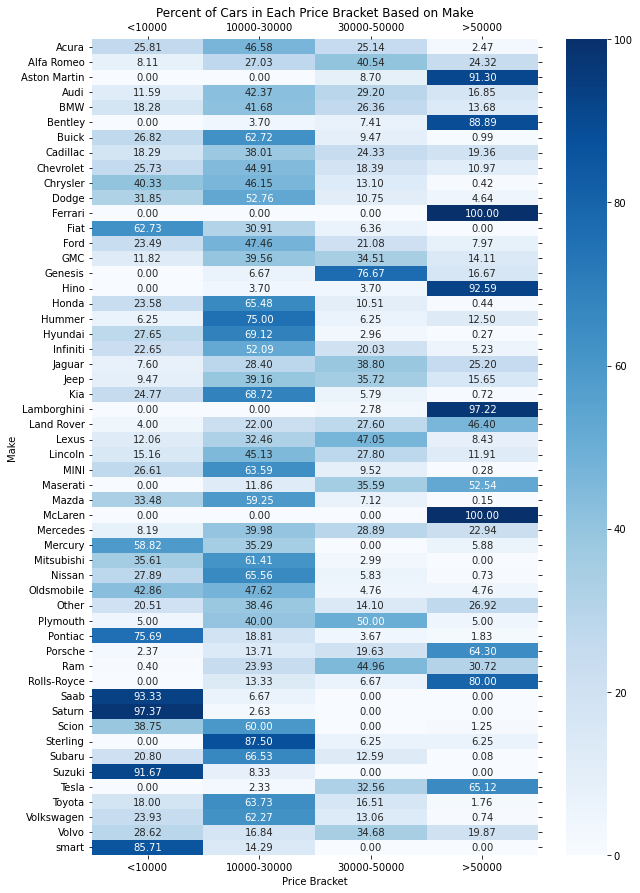

In [218]:
plt.subplots(figsize=(10,15))
sns.heatmap(piv,cmap="Blues",annot=True,fmt=".2f");
plt.xlabel("Price Bracket")
plt.ylabel("Make");
plt.title("Percent of Cars in Each Price Bracket Based on Make");
plt.tick_params(right=True, top=True, labeltop=True,rotation=0);

<b>Insight 1:</b> Premium luxury vehicles such as Aston Martin, Bentley, Rolls-Royce, Ferrari, Tesla, Porsche, Maserati and Lamborghini have overwhelming majority of their cars listed upwards of 50,000\\$. Brands such as Toyota, Honda, Hyundai, Kia and Nissan have their cars mostly listed under the second tier, 10,000\\$ - 30,000\\$. The brands like Saturn, Saab, Suzuki, Smart and Fiat have almost all of their listings under 10,000\\$. This could be due to the lower perception of brand quality in the used market in Canada or perhaps in Ontario in particular.

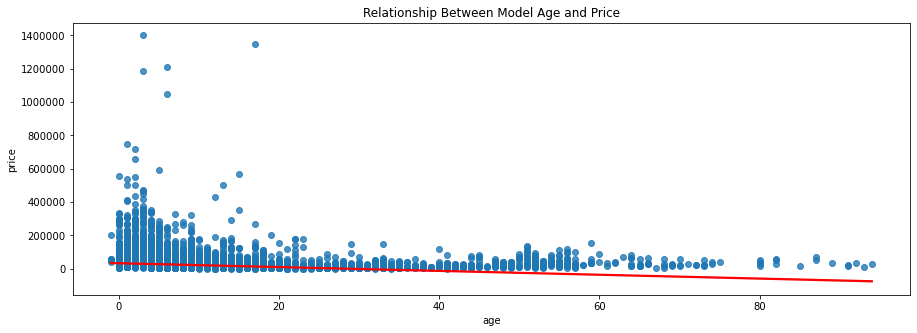

In [220]:
plt.subplots(figsize=(15,5))
g = sns.regplot(x="age",y="price",data=cars)
regline = g.get_lines()[0]
regline.set_color('red')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relationship Between Model Age and Price");

<b>Insight 2:</b> As expected, price goes down as the vehicle ages, sort of insight that is also backed up by the downward sloping curve on the graph above.

<b>Insight 3:</b> Our dataset contains relatively older cars that skew the data a little on the right edge above the red trendline. This should be due to vintage cars for which we already created a new variable earlier. But despite this the Insight 2 still holds. 

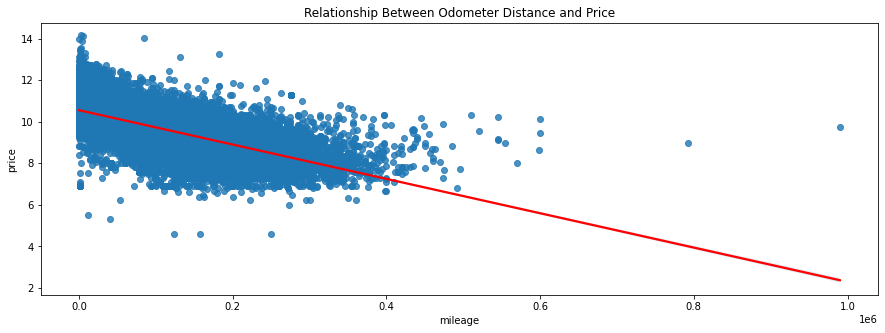

In [223]:
plt.subplots(figsize=(15,5))
g = sns.regplot(x="mileage",y=np.log(cars.price),data=cars) #taking log of the price
regline = g.get_lines()[0]
regline.set_color('red')
plt.title("Relationship Between Odometer Distance and Price");

In [227]:
cars.head()

id first_date_seen last_date_seen  year      make       model  mileage  \
0  243517      2021-04-05     2021-05-03  2007   Pontiac  Grand Prix   166014   
1  341545      2021-04-16     2021-05-03  2016     Acura         MDX    97902   
2  345845      2021-04-16     2021-05-03  2005  Infiniti        G35X   108000   
3  254761      2021-04-08     2021-05-03  2016      Ford       F-150   186750   
4  256183      2021-04-08     2021-05-03  2015     Honda        CR-V   124394   

   price                  color body_type drivetrain       transmission  \
0   3000                   Blue     Sedan        FWD          Automatic   
1  24989  Lunar Silver Metallic       SUV        AWD  9 Speed Automatic   
2   6400                   Gold     Sedan        AWD          Automatic   
3  33821                   Grey     Truck        4x4  6 Speed Automatic   
4  17443                  White       SUV        AWD          Automatic   

          fuel_type     engine  passengers  \
0          Gasoline        NaN           7   
1  Premium Unleaded  3.5L 6cyl           7   
2          Gasoline        NaN           5   
3               Gas  5.0L 8cyl           5   
4               Gas        2.4           5   

                                         description  is_private  \
0  4dr Sdn Pontiac Grand Prix 2007, mint conditio...           1   
1  AWD|LEATHER|SUN ROOF|BACK UP CAM|HEATED SEATS|...           0   
2  Sedan Runs very smooth just safetied last week...           1   
3  XL At Barrie Ford, we've proudly dedicated our...           0   
4  EX, AWD, One Owner, Accident Free & Certified!...           0   

            seller_name  longitude  latitude  age  vintage classifications  \
0        Private Seller        -80        44   14        0          <10000   
1   Gorrud's Auto Group        -80        44    5        0     10000-30000   
2        Private Seller        -80        44   16        0          <10000   
3           BARRIE FORD        -80        44    5        0     30000-50000   
4  TOP PICKS AUTO SALES        -79        46    6        0     10000-30000   

   vin_provided  carfax_provided  
0             1                0  
1             1                1  
2             0                0  
3             1                1  
4             1                1

<b>Insight 4:</b> The trend is obvious that prices go down as car accumulates more mileage on their odometers.

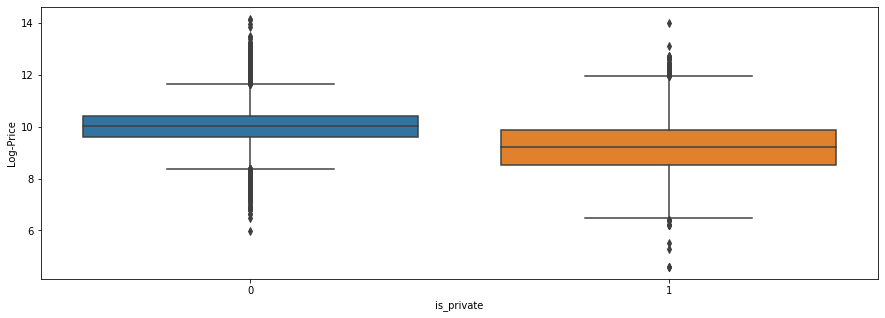

In [255]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.is_private, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 5:</b>
    
* Private sellers tend to have lower prices.

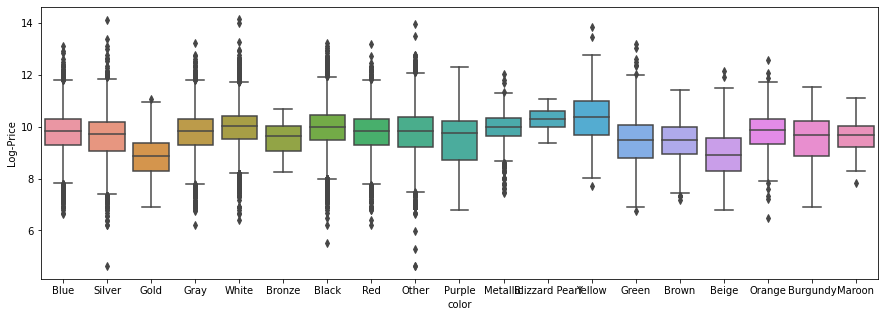

In [258]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.color, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 6:</b>
    
* Selling price does not vary a lot across different body colors. While Yellow, Black and White cars look slightly more expensive, gold-color vehicles sells cheaper than the rest. But again, it is not too much of a difference.

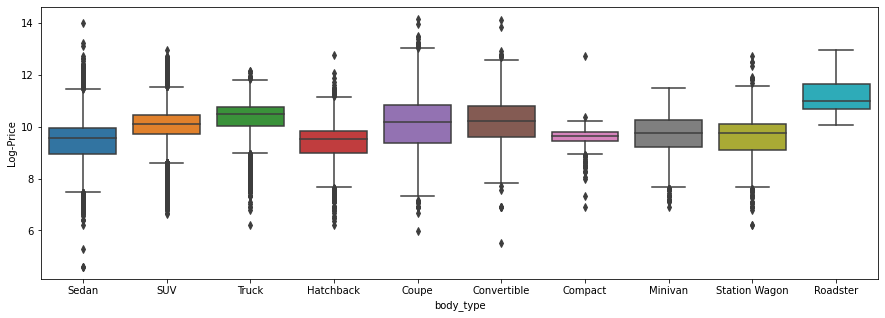

In [273]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.body_type, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 7:</b>
* Body type is an important differentiator. Roadsters are by far the most expensive cars according to the data. This makes sense because sport cars mostly target more wealthy consumers. Trucks follows roadsters on a descending order. Hatchbacks are listed as most affordable cars while sedans follow hatchback in affordability. The graph also displays that two other sporty-looking body types, namely convertibles and coupes, have larger variance, meaning that their prices could go up and down by a lot.

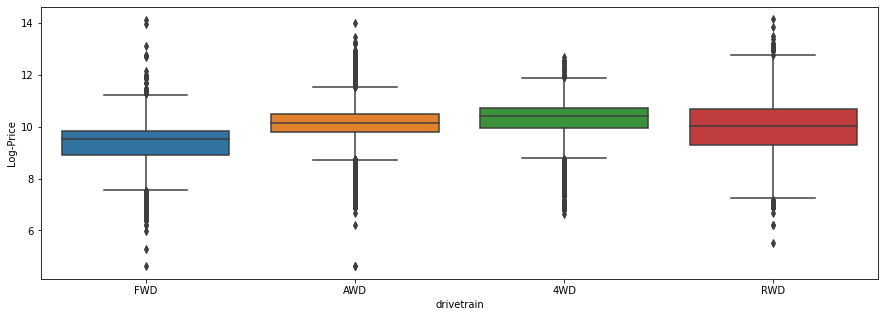

In [275]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.drivetrain, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 8:</b>
* Car prices look similar across different drive train types. That being said, 4WD cars have higher prices than average whereas FWD vehicles stand out as the most affordable type.

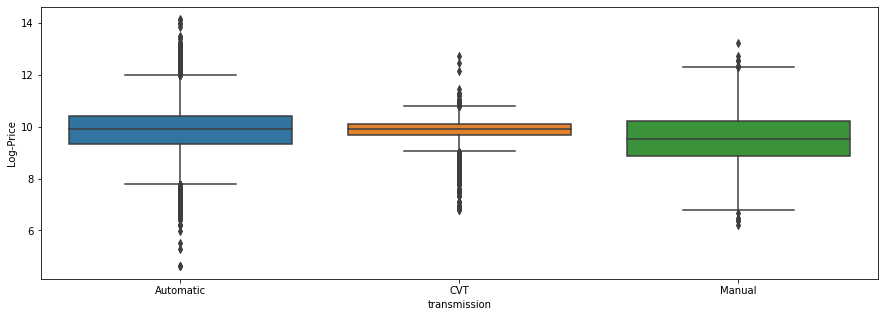

In [276]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.transmission, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 9:</b>
* Transmission types do not make any difference when it comes to price but Manual vehicles sell cheaper than automatic and CVTs in general.

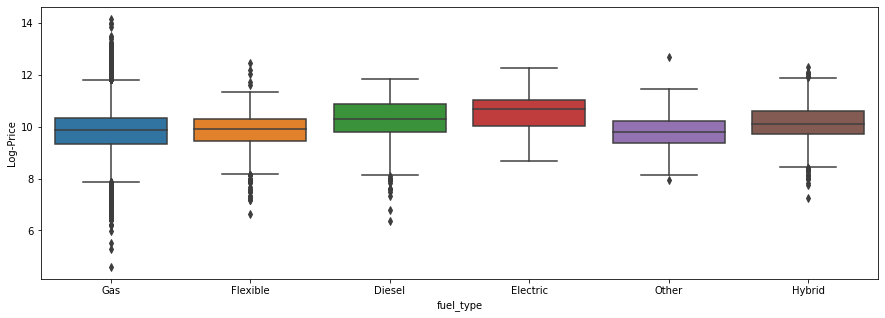

In [277]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.fuel_type, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 10:</b>
* As per fuel type, electric cars are more expensive as expected because they are made with high technology. Meanwhile, hybrid and diesel vehicles are above average too. Technology aspect applies for hybrid cars too. About diesel vehicles, I assume it is due to large engine vehicles like pickups using diesel fuels.

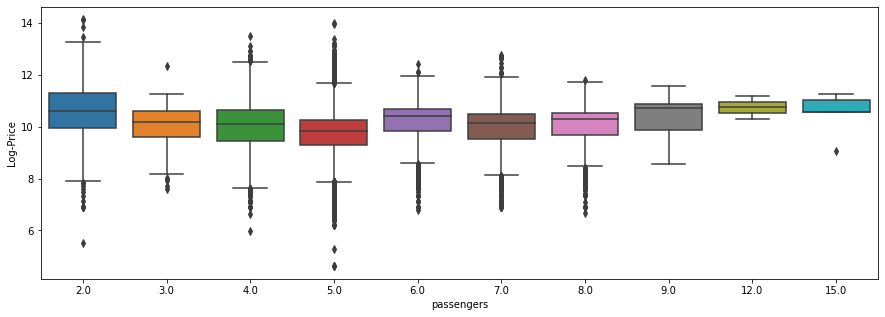

In [278]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.passengers, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 11:</b>
* In terms of passenger capacity, the most popular option is 5. It is the category that is closer to the average the most too. Moving further from 5 to both sides increase price. This should be due to the fact that cars with lower passenger capacity tend to be sport cars and those with higher passenger seats are larger cars like minivans which require a bigger engine with high cost. 

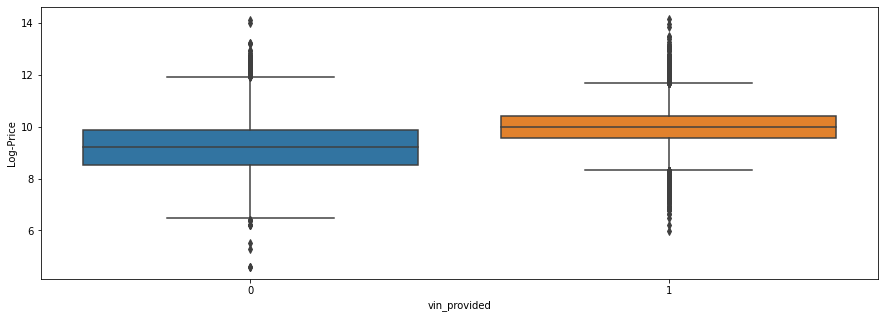

In [280]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.vin_provided, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 12:</b>
* An interesting result: if a seller provides VIN number in the listing, its selling price tend to be higher than the others most of the time. Looks like trust is not something you get for free!

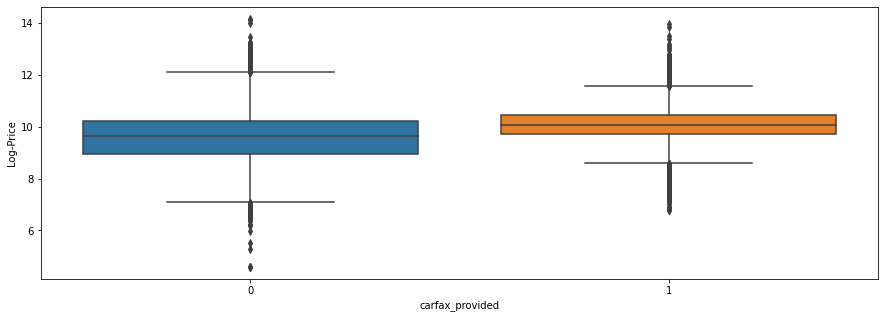

In [281]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.carfax_provided, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 13:</b>
* Same thing for CARFAX report. If it is available, selling prices is mostly higher.

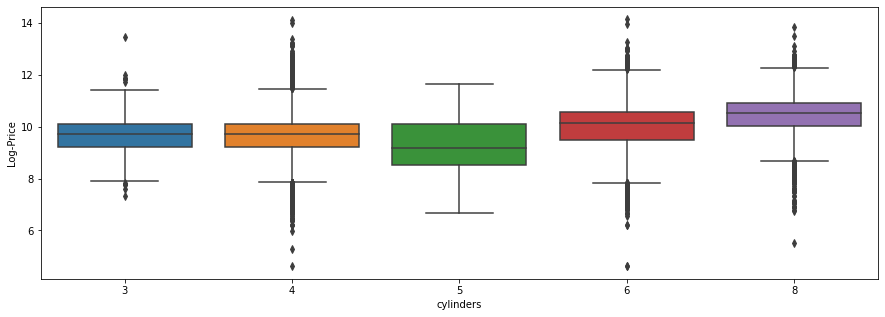

In [284]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.cylinders, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 



<b>Insight 14:</b>
* More cylinders is associated with higher prices. Should be a result of bigger cars with large engine or/and that of sport cars.  

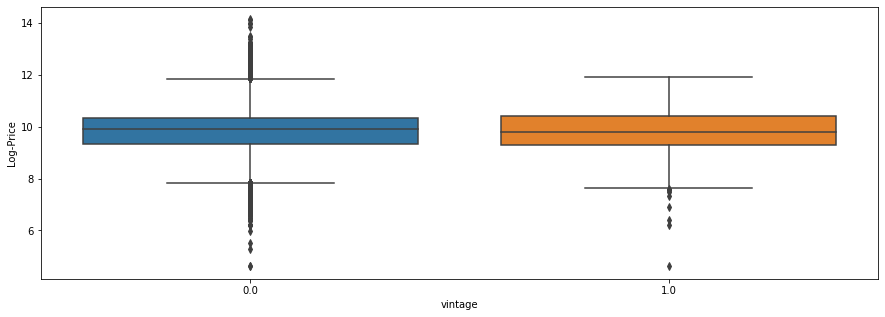

In [286]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.vintage, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 



<b>Insight 15:</b>
* This is surprising because one can expect vintage cars to be most expensive. However, it is also noteworthy that sport vehicles that skew the data are mostly new cars so two fields should be cancelling out each other's effect. It would be interesting to see the impact a combination of both fields might have. We'll explore that in the modelling phase!   

In [287]:
text_list = list(cars.description.astype('str'))
text = '-'.join(text_list)
my_stop_words =["car","power","vehicle","available","Please","drive","price","great","call","vehicles","Control","customer"]+list(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stop_words, collocations=False).generate(text)

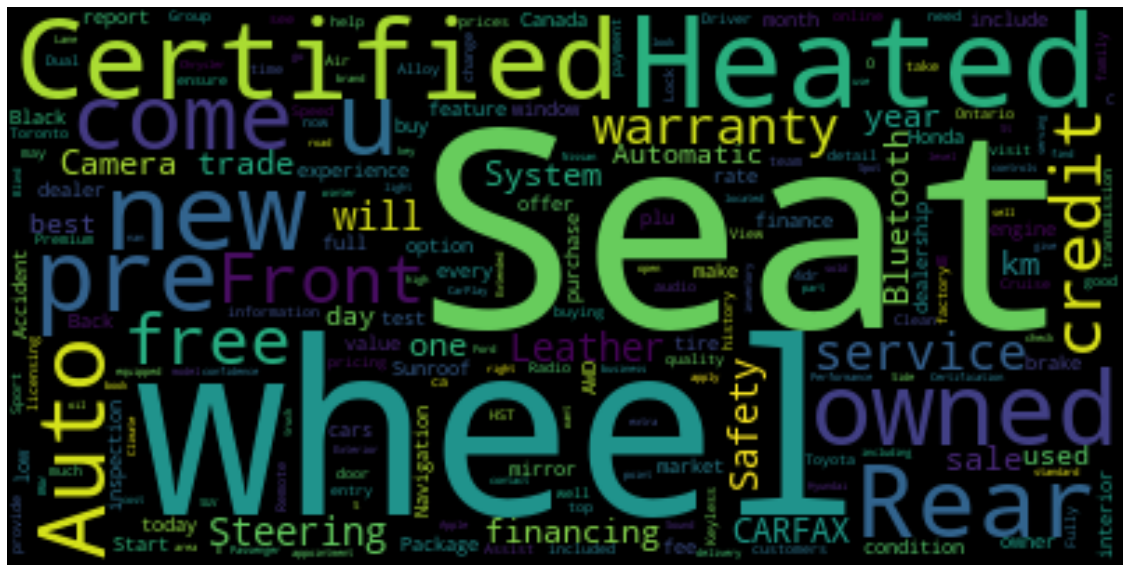

In [288]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<b>Insight 16:</b>

As you might recall already, I merged trim and description fields earlier because they both contain long strings that is not feasible for numeric or categorical transformation. However, the strings stored in both fields are still valuable in the sense that we can capture most common keywords and try to understand what sort of information sellers put on most listings. This would help us know more about popular features on used vehicles and also help us perform a better data collection in further projects.

By applying a WordCloud, a popular tool for sentiment analysis, I have been able to see:
* Cars with heated seats seem to be on demand. The word cloud also captured the words 'Rear' and 'Front'. Those could be in the sense of wheels as well as seats.
* The words 'Certified', 'Pre', 'Owned' could be associated with Certified Pre Owned Vehicles. It should be an on-demand feature on used cars.
* Warranty on used cars is also popular. One might say that most used cars come with a warranty. It could be useful to have a boolean field that checks whether a car has warranty or not. 
* CARFAX is important and it is good that we already have a separate field for that. The word 'Safety' is also popular in a similar vein.
* Credit is another common tag that the Wordcloud has captured. Should be purely due to the fact that 3/4 of the vehicles on our dataset is listed by dealers.
* Camera, bluetooth, sunroof, leather(seats perhaps) are other features that most cars seem to have.

In [289]:
searchfor = ['one owner', 'single owner','one-owner', '1 owner','sole owner','only owner'] #potential tags

cars.loc[cars['description'].str.contains('|'.join(searchfor),na=False,flags=re.IGNORECASE), "one_owner"] = 1
cars.loc[cars.one_owner != 1, 'one_owner'] = 0  
cars.one_owner.value_counts()

0    43671
1     8357
Name: one_owner, dtype: int64

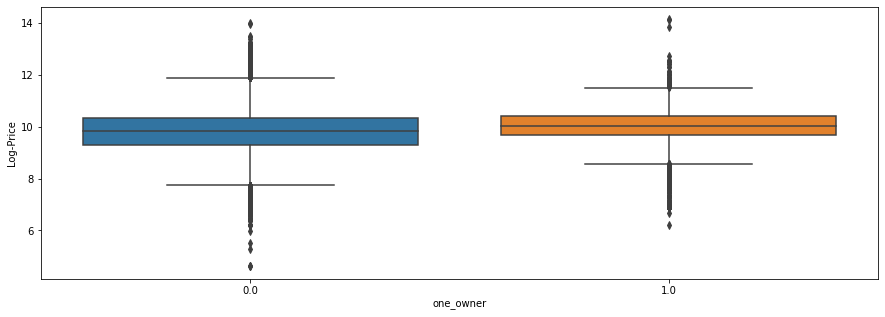

In [290]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.one_owner, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 17:</b>

From my own experience being in the market for a used car recently, I think an important factor people seem to justifiably associate prices is the number of previous users. I figured through my personal experience that the fewer previous owners a car has the more expensive its asking price will be. The principle applies to the accident status: If a car is accident free, it could be higher in price.

* A <b>No. of owners</b> column would come in handy. In fact, the code above checks whether the improved description field has such info. Understandably, I had to limit my scope to look for certain vehicles, perhaps those with single owners.
* And voila! Cars with one owner tags in the description are associated with higher prices.

#### Adding new features based on the word cloud
* <b>Heated Seats</b>

In [292]:
cars.loc[cars['description'].str.contains('heated seats',na=False,flags=re.IGNORECASE), "heated_seats"] = 1
cars.loc[cars.heated_seats != 1, 'heated_seats'] = 0  
cars.heated_seats.value_counts()

0    41395
1    10633
Name: heated_seats, dtype: int64

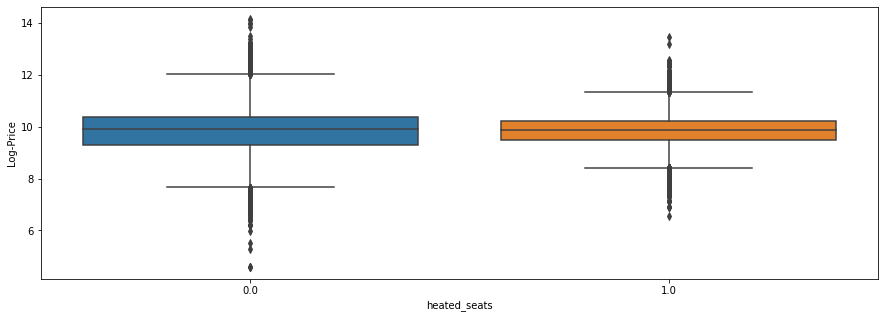

In [293]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.heated_seats, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b>Sunroof</b>

In [294]:
cars.loc[cars['description'].str.contains('sunroof',na=False,flags=re.IGNORECASE), "sunroof"] = 1
cars.loc[cars.sunroof != 1, 'sunroof'] = 0  
cars.sunroof.value_counts()

0    41624
1    10404
Name: sunroof, dtype: int64

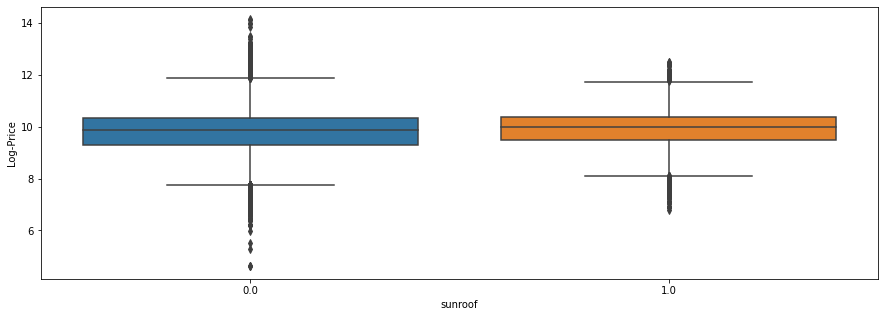

In [295]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.sunroof, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b>Camera</b>

In [296]:
cars.loc[cars['description'].str.contains('camera',na=False,flags=re.IGNORECASE), "camera"] = 1
cars.loc[cars.camera != 1, 'camera'] = 0  
cars.camera.value_counts()

0    35635
1    16393
Name: camera, dtype: int64

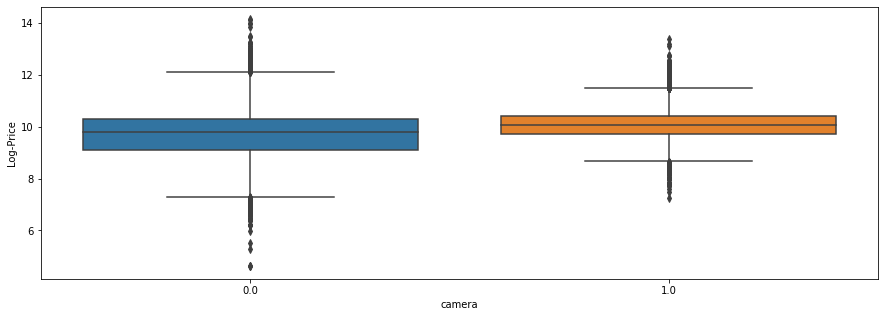

In [297]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.camera, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* One thing I worried a lot about when looking for a used vehicle was whether it had any accients. Let's create a new field called <b>accident_free</b>.

In [298]:
searchfor = ['no accident', 'accident free','no-accident', 'accident-free','no damage','no-damage','no dent','no-dent'] 
# I included no damage tags as well because they are essentially measuring the similar thing.

cars.loc[cars['description'].str.contains('|'.join(searchfor),na=False,flags=re.IGNORECASE), "accident_free"] = 1
cars.loc[cars.accident_free != 1, 'accident_free'] = 0  
cars.accident_free.value_counts()

0    42048
1     9980
Name: accident_free, dtype: int64

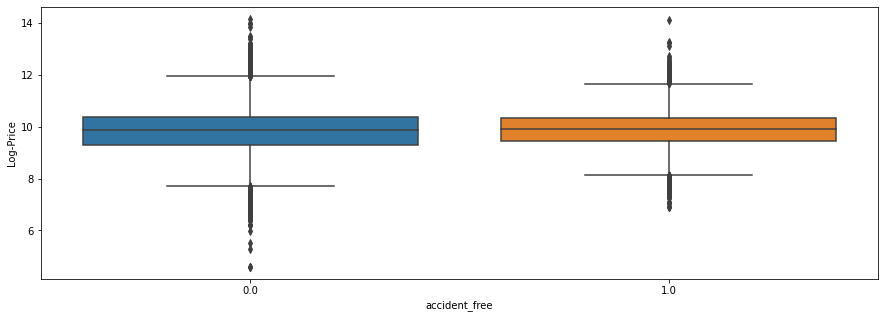

In [299]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.accident_free, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b> Rebuilt status</b>

In [302]:
cars.loc[cars['description'].str.contains('rebuilt',na=False,flags=re.IGNORECASE), "rebuilt"] = 1
cars.loc[cars.rebuilt != 1, 'rebuilt'] = 0  
cars.rebuilt.value_counts()

0    51705
1      323
Name: rebuilt, dtype: int64

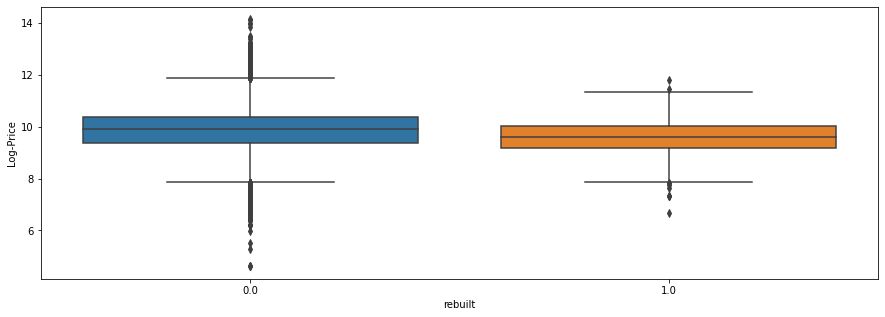

In [303]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.rebuilt, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

In [304]:
cars.loc[cars['description'].str.contains('clean title',na=False,flags=re.IGNORECASE), "clean_title"] = 1
cars.loc[cars.clean_title != 1, 'clean_title'] = 0  
cars.clean_title.value_counts()

0    51461
1      567
Name: clean_title, dtype: int64

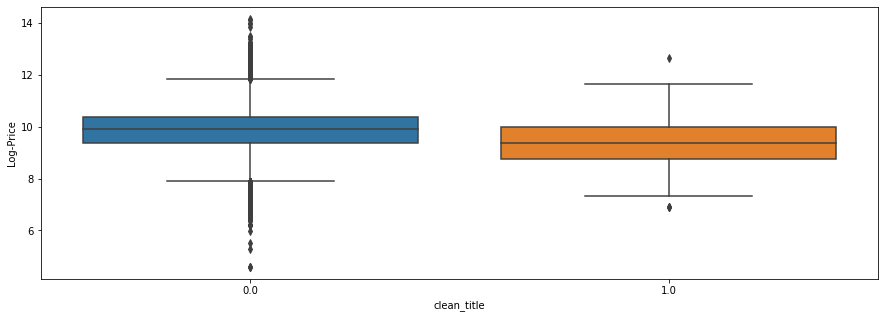

In [305]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.clean_title, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b> Insight 18:</b> This is by far the most interesting result from our new variables. The result should have been the other way around. I assume the way we created this column is to blame! We have been able to get title info from only 500 rows (1%) and tagged the rest as NOT HAVING CLEAN TITLE.

In [306]:
cars.loc[cars['description'].str.contains('leather seat',na=False,flags=re.IGNORECASE), "leather_seats"] = 1
cars.loc[cars.leather_seats != 1, 'leather_seats'] = 0  
cars.leather_seats.value_counts()

0    48223
1     3805
Name: leather_seats, dtype: int64

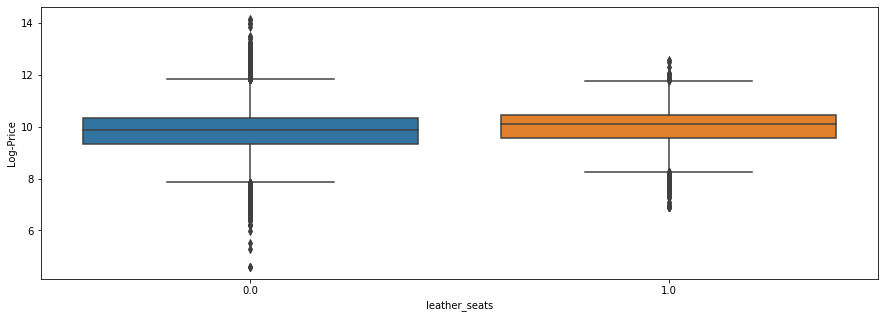

In [307]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.leather_seats, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

In [308]:
cars.loc[cars['description'].str.contains('bluetooth',na=False,flags=re.IGNORECASE), "bluetooth"] = 1
cars.loc[cars.bluetooth != 1, 'bluetooth'] = 0  
cars.bluetooth.value_counts()

0    37419
1    14609
Name: bluetooth, dtype: int64

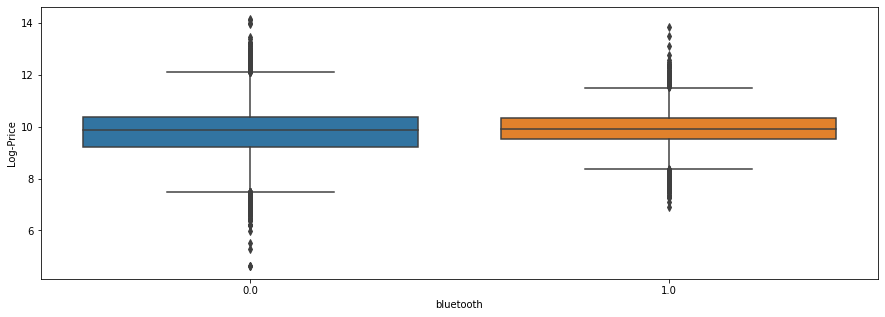

In [309]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.bluetooth, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 19:</b>

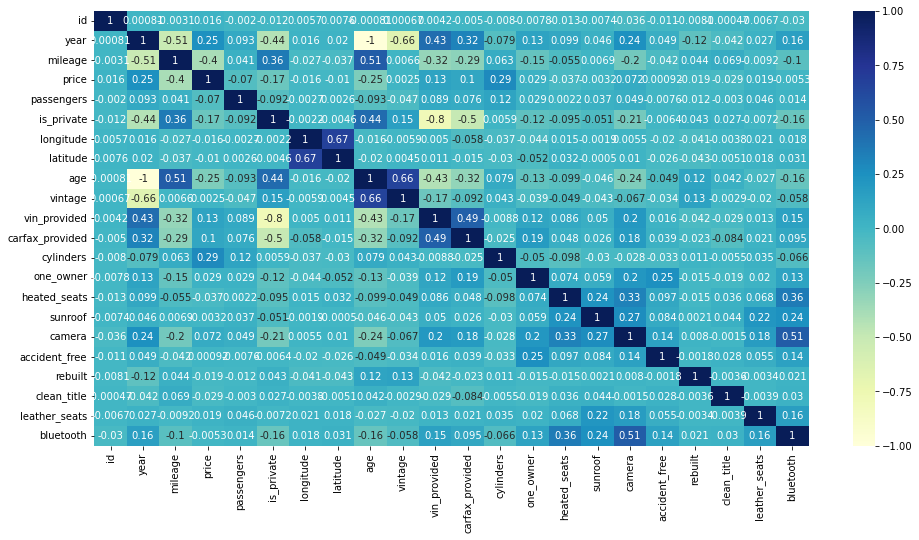

In [310]:
# Sketching our correlating matrix to see if there are any further insights we can drive.

cars_corr = cars.corr()

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cars_corr, cmap="YlGnBu", annot=True)
plt.show()

As displayed in the correlation matrix above, <b>price</b> looks correlated with <b>age</b>, <b>mileage</b> and <b>cylinder</b> variables. Correlation is often confused with causation. The graph above only tells us that there are positive or negative relationship between price and the other highlighted variables. And that's it. It does not imply that cylinders are what make vehicles expensive. There could be a 3rd variable, total engine volume for instance (we removed this variable from our dataset earlier because it had data quality issues.) that is causing prices to get higher and since cylinders are engine size are related, they have a correlation. That being said, causation is often hard to detect and correlation is good enough for basic relationship analysis until we can locate causation!

Another important point to make here is that this matrix might show weak correlation between our target variable, price in this case, and other variables. However, we should not rule out the possibility that some variables have collective relationship with the targer variable. That is, a combination of several different fields might be relevant to exlain price differences and such a quest warrants further and deeper modelling.

### Step 7: Preprocessing for Modelling

We will now process the data and do some feature engineering for our machine learning models.

In [314]:
cars.head()

id first_date_seen last_date_seen  year      make       model  mileage  \
0  243517      2021-04-05     2021-05-03  2007   Pontiac  Grand Prix   166014   
1  341545      2021-04-16     2021-05-03  2016     Acura         MDX    97902   
2  345845      2021-04-16     2021-05-03  2005  Infiniti        G35X   108000   
3  254761      2021-04-08     2021-05-03  2016      Ford       F-150   186750   
4  256183      2021-04-08     2021-05-03  2015     Honda        CR-V   124394   

   price   color body_type drivetrain transmission fuel_type  passengers  \
0   3000    Blue     Sedan        FWD    Automatic       Gas           7   
1  24989  Silver       SUV        AWD    Automatic       Gas           7   
2   6400    Gold     Sedan        AWD    Automatic       Gas           5   
3  33821    Gray     Truck        4WD    Automatic       Gas           5   
4  17443   White       SUV        AWD    Automatic       Gas           5   

                                         description  is_private  longitude  \
0  4dr Sdn Pontiac Grand Prix 2007, mint conditio...           1        -80   
1  AWD|LEATHER|SUN ROOF|BACK UP CAM|HEATED SEATS|...           0        -80   
2  Sedan Runs very smooth just safetied last week...           1        -80   
3  XL At Barrie Ford, we've proudly dedicated our...           0        -80   
4  EX, AWD, One Owner, Accident Free & Certified!...           0        -79   

   latitude  age  vintage classifications  vin_provided  carfax_provided  \
0        44   14        0          <10000             1                0   
1        44    5        0     10000-30000             1                1   
2        44   16        0          <10000             0                0   
3        44    5        0     30000-50000             1                1   
4        46    6        0     10000-30000             1                1   

   cylinders  one_owner  heated_seats  sunroof  camera  accident_free  \
0          6          0             0        0       0              0   
1          6          0             1        0       1              0   
2          8          0             0        1       0              0   
3          8          0             0        0       0              0   
4          4          1             1        1       1              1   

   rebuilt  clean_title  leather_seats  bluetooth  
0        0            0              0          0  
1        0            0              0          0  
2        0            0              0          0  
3        0            0              0          0  
4        0            0              0          1

* Removing unnecessary columns from my dataset

In [332]:
cars_new= cars.drop(columns=['id','first_date_seen','last_date_seen','year','model','description','longitude','latitude','classifications'])

In [333]:
cars_new.head()

make  mileage  price   color body_type drivetrain transmission  \
0   Pontiac   166014   3000    Blue     Sedan        FWD    Automatic   
1     Acura    97902  24989  Silver       SUV        AWD    Automatic   
2  Infiniti   108000   6400    Gold     Sedan        AWD    Automatic   
3      Ford   186750  33821    Gray     Truck        4WD    Automatic   
4     Honda   124394  17443   White       SUV        AWD    Automatic   

  fuel_type  passengers  is_private  age  vintage  vin_provided  \
0       Gas           7           1   14        0             1   
1       Gas           7           0    5        0             1   
2       Gas           5           1   16        0             0   
3       Gas           5           0    5        0             1   
4       Gas           5           0    6        0             1   

   carfax_provided  cylinders  one_owner  heated_seats  sunroof  camera  \
0                0          6          0             0        0       0   
1                1          6          0             1        0       1   
2                0          8          0             0        1       0   
3                1          8          0             0        0       0   
4                1          4          1             1        1       1   

   accident_free  rebuilt  clean_title  leather_seats  bluetooth  
0              0        0            0              0          0  
1              0        0            0              0          0  
2              0        0            0              0          0  
3              0        0            0              0          0  
4              1        0            0              0          1

#### Let's remove some outliers

* In order to have the make field a feasible predictor, I remove vehicles under the 'Other' category that I earlier created for brands which have less than 15 listings under them. They make up around 78 listings in total.

In [334]:
cars_new=cars_new[cars_new.make!='Other']

In [337]:
cars_new.describe()

mileage   price  passengers  is_private   age  vintage  vin_provided  \
count    51950   51950       51950       51950 51950    51950         51950   
mean     90571   25315           5           0     6        0             1   
std      69432   28131           1           0     6        0             0   
min          0     100           2           0    -1        0             0   
25%      39015   11500           5           0     3        0             1   
50%      73516   19900           5           0     4        0             1   
75%     128674   31500           5           0     8        0             1   
max     990000 1399888          15           1    94        1             1   

       carfax_provided  cylinders  one_owner  heated_seats  sunroof  camera  \
count            51950      51950      51950         51950    51950   51950   
mean                 0          5          0             0        0       0   
std                  0          1          0             0        0       0   
min                  0          3          0             0        0       0   
25%                  0          4          0             0        0       0   
50%                  0          4          0             0        0       0   
75%                  1          6          0             0        0       1   
max                  1          8          1             1        1       1   

       accident_free  rebuilt  clean_title  leather_seats  bluetooth  
count          51950    51950        51950          51950      51950  
mean               0        0            0              0          0  
std                0        0            0              0          0  
min                0        0            0              0          0  
25%                0        0            0              0          0  
50%                0        0            0              0          0  
75%                0        0            0              0          1  
max                1        1            1              1          1

* Let's see if we have potential outliers for our target variables by the Interquartile range method.

 <b>Price</b> 

<AxesSubplot:xlabel='price'>

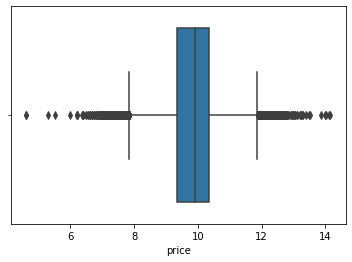

In [338]:
sns.boxplot(np.log(cars_new.price)) # A lot of outliers actually. Let's remove them for our model.

In [339]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR   #upper limit
  LL = Q1 - 1.5*IQR   #lower limit
  return UL, LL

In [340]:
#Apply the function to your data
outlier_limits(cars_new.price)
UL, LL = outlier_limits(cars_new["price"])

In [341]:
cars_new=cars_new[(cars_new.price > LL) & (cars_new.price  < UL)]

<AxesSubplot:xlabel='price'>

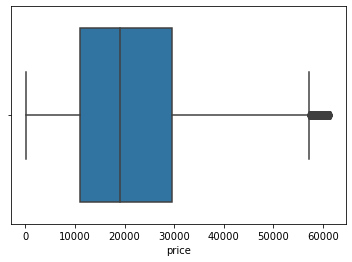

In [342]:
sns.boxplot(cars_new.price)

In [343]:
cars_new.price.describe()

count   49549
mean    21494
std     13508
min       100
25%     10999
50%     18990
75%     29495
max     61495
Name: price, dtype: float64

 <b>Mileage</b> 

<AxesSubplot:xlabel='price'>

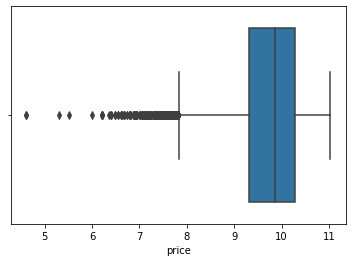

In [344]:
sns.boxplot(np.log(cars_new.price)) # A lot of duplicates here as well. Let's remove them for our model.

In [345]:
outlier_limits(cars_new.mileage)
UL, LL = outlier_limits(cars_new["mileage"])

In [346]:
cars_new=cars_new[(cars_new.mileage > LL) & (cars_new.mileage  < UL)]

<AxesSubplot:xlabel='mileage'>

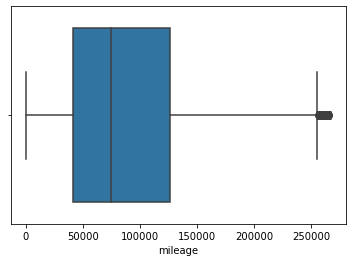

In [347]:
sns.boxplot(cars_new.mileage)

* Let's get our dummy variables for the categorical variables.

In [349]:
dummy_columns=['make','color','body_type','drivetrain','transmission','fuel_type']

cars_new_expanded = pd.get_dummies(cars_new)
cars_new_expanded.head()

mileage  price  passengers  is_private  age  vintage  vin_provided  \
0   166014   3000           7           1   14        0             1   
1    97902  24989           7           0    5        0             1   
2   108000   6400           5           1   16        0             0   
3   186750  33821           5           0    5        0             1   
4   124394  17443           5           0    6        0             1   

   carfax_provided  cylinders  one_owner  heated_seats  sunroof  camera  \
0                0          6          0             0        0       0   
1                1          6          0             1        0       1   
2                0          8          0             0        1       0   
3                1          8          0             0        0       0   
4                1          4          1             1        1       1   

   accident_free  rebuilt  clean_title  leather_seats  bluetooth  make_Acura  \
0              0        0            0              0          0           0   
1              0        0            0              0          0           1   
2              0        0            0              0          0           0   
3              0        0            0              0          0           0   
4              1        0            0              0          1           0   

   make_Alfa Romeo  make_Aston Martin  make_Audi  make_BMW  make_Bentley  \
0                0                  0          0         0             0   
1                0                  0          0         0             0   
2                0                  0          0         0             0   
3                0                  0          0         0             0   
4                0                  0          0         0             0   

   make_Buick  make_Cadillac  make_Chevrolet  make_Chrysler  make_Dodge  \
0           0              0               0              0           0   
1           0              0               0              0           0   
2           0              0               0              0           0   
3           0              0               0              0           0   
4           0              0               0              0           0   

   make_Ferrari  make_Fiat  make_Ford  make_GMC  make_Genesis  make_Hino  \
0             0          0          0         0             0          0   
1             0          0          0         0             0          0   
2             0          0          0         0             0          0   
3             0          0          1         0             0          0   
4             0          0          0         0             0          0   

   make_Honda  make_Hummer  make_Hyundai  make_Infiniti  make_Jaguar  \
0           0            0             0              0            0   
1           0            0             0              0            0   
2           0            0             0              1            0   
3           0            0             0              0            0   
4           1            0             0              0            0   

   make_Jeep  make_Kia  make_Lamborghini  make_Land Rover  make_Lexus  \
0          0         0                 0                0           0   
1          0         0                 0                0           0   
2          0         0                 0                0           0   
3          0         0                 0                0           0   
4          0         0                 0                0           0   

   make_Lincoln  make_MINI  make_Maserati  make_Mazda  make_Mercedes  \
0             0          0              0           0              0   
1             0          0              0           0              0   
2             0          0              0           0              0   
3             0          0              0           0              0   
4             0          0         

In [351]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) #Just a formatting script

std = StandardScaler()
cars_new_expanded_std = std.fit_transform(cars_new_expanded)
cars_new_expanded_std = pd.DataFrame(cars_new_expanded_std, columns = cars_new_expanded.columns)
print(cars_new_expanded_std.shape)
cars_new_expanded_std.head()

(48409, 112)


mileage     price  passengers  is_private       age   vintage  \
0 1.283729 -1.406067    2.160735    1.827902  1.404769 -0.092308   
1 0.159652  0.232797    2.160735   -0.547075 -0.188021 -0.092308   
2 0.326303 -1.152661   -0.200044    1.827902  1.758723 -0.092308   
3 1.625942  0.891056   -0.200044   -0.547075 -0.188021 -0.092308   
4 0.596859 -0.329614   -0.200044   -0.547075 -0.011044 -0.092308   

   vin_provided  carfax_provided  cylinders  one_owner  heated_seats  \
0      0.489072        -0.993227   0.844786  -0.444511     -0.517124   
1      0.489072         1.006820   0.844786  -0.444511      1.933772   
2     -2.044690        -0.993227   2.388703  -0.444511     -0.517124   
3      0.489072         1.006820   2.388703  -0.444511     -0.517124   
4      0.489072         1.006820  -0.699130   2.249661      1.933772   

    sunroof    camera  accident_free   rebuilt  clean_title  leather_seats  \
0 -0.504489 -0.688931      -0.492927 -0.076137    -0.104709      -0.282252   
1 -0.504489  1.451525      -0.492927 -0.076137    -0.104709      -0.282252   
2  1.982204 -0.688931      -0.492927 -0.076137    -0.104709      -0.282252   
3 -0.504489 -0.688931      -0.492927 -0.076137    -0.104709      -0.282252   
4  1.982204  1.451525       2.028696 -0.076137    -0.104709      -0.282252   

   bluetooth  make_Acura  make_Alfa Romeo  make_Aston Martin  make_Audi  \
0  -0.638248   -0.145234        -0.024483          -0.012856  -0.174217   
1  -0.638248    6.885419        -0.024483          -0.012856  -0.174217   
2  -0.638248   -0.145234        -0.024483          -0.012856  -0.174217   
3  -0.638248   -0.145234        -0.024483          -0.012856  -0.174217   
4   1.566788   -0.145234        -0.024483          -0.012856  -0.174217   

   make_BMW  make_Bentley  make_Buick  make_Cadillac  make_Chevrolet  \
0 -0.231531     -0.007872   -0.101745      -0.099546       -0.255018   
1 -0.231531     -0.007872   -0.101745      -0.099546       -0.255018   
2 -0.231531     -0.007872   -0.101745      -0.099546       -0.255018   
3 -0.231531     -0.007872   -0.101745      -0.099546       -0.255018   
4 -0.231531     -0.007872   -0.101745      -0.099546       -0.255018   

   make_Chrysler  make_Dodge  make_Ferrari  make_Fiat  make_Ford  make_GMC  \
0      -0.098589   -0.201787     -0.004545  -0.047723  -0.297454 -0.139109   
1      -0.098589   -0.201787     -0.004545  -0.047723  -0.297454 -0.139109   
2      -0.098589   -0.201787     -0.004545  -0.047723  -0.297454 -0.139109   
3      -0.098589   -0.201787     -0.004545  -0.047723   3.361869 -0.139109   
4      -0.098589   -0.201787     -0.004545  -0.047723  -0.297454 -0.139109   

   make_Genesis  make_Hino  make_Honda  make_Hummer  make_Hyundai  \
0     -0.024057  -0.006428   -0.342859    -0.015746     -0.268711   
1     -0.024057  -0.006428   -0.342859    -0.015746     -0.268711   
2     -0.024057  -0.006428   -0.342859    -0.015746     -0.268711   
3     -0.024057  -0.006428   -0.342859    -0.015746     -0.268711   
4     -0.024057  -0.006428    2.916655    -0.015746     -0.268711   

   make_Infiniti  make_Jaguar  make_Jeep  make_Kia  make_Lamborghini  \
0      -0.107004    -0.066792  -0.195039 -0.188085         -0.004545   
1      -0.107004    -0.066792  -0.195039 -0.188085         -0.004545   
2       9.345458    -0.066792  -0.195039 -0.188085         -0.004545   
3      -0.107004    -0.066792  -0.195039 -0.188085         -0.004545   
4      -0.107004    -0.066792  -0.195039 -0.188085         -0.004545   

   make_Land Rover  make_Lexus  make_Lincoln  make_MINI  make_Maserati  \
0        -0.083226   -0.153967     -0.071322  -0.085951      -0.027280   
1        -0.083226   -0.153967     -0.071322  -0.085951      -0.027280   
2        -0.083226   -0.153967     -0.071322  -0.085951      -0.027280   
3        -0.083226   -0.153967     -0.071322  -0.085951      -0.027280   
4        -0.083226   -0.153967     -0.071322  -0.085951      -0.027280   

   make_Mazda  make_Mercedes  make_Mercury  ma

In [352]:
X_train, X_test, y_train, y_test = train_test_split(cars_new_expanded_std.drop(columns = ['price']), cars_new_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36306, 111)
(12103, 111)
(36306, 1)
(12103, 1)


### Step 8: Modelling

With dummy variables added to our dataset, I ended up with a lot of variables on my hand. For this reason, I am using SelectKBest function from sklearn to choose optimal number of variables from the dataset.

I randomly decide that the final number of variables could be anything from 3 to 100.

<AxesSubplot:>

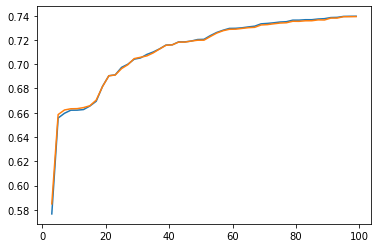

In [354]:
column_names = cars_new_expanded_std.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 100, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get an R score of around 0.72 with around 55 variables. It goes up to 0.74 with nearly 100 variables. It is not worth having extra 45 variables for an 0.02 additional points.

I keep k as 55 and let the machine choose best variables.

In [355]:
selector = SelectKBest(f_regression, k = 55)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'passengers', 'is_private', 'age', 'vin_provided',
       'carfax_provided', 'cylinders', 'one_owner', 'sunroof', 'camera',
       'clean_title', 'leather_seats', 'bluetooth', 'make_Audi', 'make_BMW',
       'make_Chrysler', 'make_Dodge', 'make_GMC', 'make_Genesis', 'make_Honda',
       'make_Hyundai', 'make_Jaguar', 'make_Jeep', 'make_Kia',
       'make_Land Rover', 'make_Lexus', 'make_Maserati', 'make_Mazda',
       'make_Mercedes', 'make_Mitsubishi', 'make_Nissan', 'make_Pontiac',
       'make_Porsche', 'make_Ram', 'make_Tesla', 'make_Volkswagen',
       'make_Volvo', 'color_Beige', 'color_Black', 'color_Brown', 'color_Gold',
       'color_Silver', 'color_White', 'body_type_Hatchback', 'body_type_SUV',
       'body_type_Sedan', 'body_type_Truck', 'drivetrain_4WD',
       'drivetrain_AWD', 'drivetrain_FWD', 'transmission_Automatic',
       'transmission_Manual', 'fuel_type_Diesel', 'fuel_type_Electric',
       'fuel_type_Hybrid'],
      dtype='object')

In [359]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [360]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

Features                                              Model     Score
0   Linear                                 LinearRegression()  0.725634
1   Linear                                            Ridge()  0.725635
2   Linear                                            Lasso() -0.000195
3   Linear                                              SVR()  0.863365
4   Linear  (DecisionTreeRegressor(max_features='auto', ra...  0.875637
5   Linear                                     MLPRegressor()  0.866894

#### Backward selection for variable selection on linear regression
Fitting a linear regression model and checking the model parameters

### Conclusion:
I got a maximum R^2 score of 0.875 with DecisionTreeRegressor. If I had more time, I would explore further transformations and fine-tuning like polynomial features and try to increase model performance. 

I would also love to deploy this model with a user-friendly interface. 